In [46]:
%matplotlib inline

from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as ss
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['figure.figsize'] = [16, 10]
%matplotlib inline

# **Read Data**

We can choose any certain person

In [47]:
df = pd.read_csv('block_10.csv', parse_dates=['day'])
df

LCLid        day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0      MAC000322 2012-03-07  0.125  0.104  0.133  0.145  0.109  0.298  0.149   
1      MAC000322 2012-03-08  0.279  0.247  0.253  0.275  0.114  0.105  0.117   
2      MAC000322 2012-03-09  0.036  0.130  0.364  0.120  0.100  0.118  0.146   
3      MAC000322 2012-03-10  0.435  0.093  0.105  0.138  0.099  0.096  0.133   
4      MAC000322 2012-03-11  0.187  0.122  0.094  0.109  0.139  0.099  0.111   
...          ...        ...    ...    ...    ...    ...    ...    ...    ...   
31473  MAC005354 2014-02-23  0.103  0.069  0.101  0.144  0.080  0.061  0.105   
31474  MAC005354 2014-02-24  0.100  0.109  0.088  0.121  0.086  0.084  0.101   
31475  MAC005354 2014-02-25  0.110  0.069  0.103  0.140  0.082  0.061  0.112   
31476  MAC005354 2014-02-26  0.130  0.102  0.086  0.102  0.105  0.096  0.062   
31477  MAC005354 2014-02-27  0.150  0.082  0.069  0.096  0.152  0.062  0.061   

        hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  \
0      0.119  ...  0.087  0.092  0.187  0.130  0.096  0.096  0.137  0.101   
1      0.141  ...  0.105  0.132  0.252  0.105  0.096  0.129  0.120  0.070   
2      0.105  ...  0.028  0.030  0.072  0.038  0.029  0.046  0.069  0.029   
3      0.129  ...  0.120  0.125  0.115  0.101  0.142  0.112  0.099  0.150   
4      0.137  ...  0.036  0.100  0.358  0.122  0.095  0.111  0.141  0.097   
...      ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
31473  0.130  ...  0.078  0.098  0.124  0.130  0.116  0.110  0.112  0.130   
31474  0.103  ...  0.064  0.114  0.135  0.141  0.081  0.130  0.128  0.090   
31475  0.129  ...  0.084  0.076  0.134  0.150  0.104  0.080  0.124  0.122   
31476  0.115  ...  0.067  0.102  0.134  0.122  0.098  0.086  0.145  0.106   
31477  0.113  ...  0.122  0.130  0.080  0.120  0.137  0.097  0.080  0.113   

       hh_46  hh_47  
0      0.137  0.485  
1      0.039  0.074  
2      0.050  0.520  
3      0.152  0.097  
4      0.095  0.122  
...      ...    ...  
31473  0.086  0.126  
31474  0.109  0.152  
31475  0.122  0.095  
31476  0.090  0.121  
31477  0.158  0.106  

[31478 rows x 50 columns]

In [48]:
df['LCLid'].unique()

array(['MAC000322', 'MAC000393', 'MAC000462', 'MAC000522', 'MAC000531',
       'MAC000830', 'MAC000857', 'MAC000884', 'MAC000931', 'MAC000985',
       'MAC001221', 'MAC001235', 'MAC001352', 'MAC001402', 'MAC001420',
       'MAC001437', 'MAC001867', 'MAC001869', 'MAC002010', 'MAC002014',
       'MAC002024', 'MAC002036', 'MAC002050', 'MAC002063', 'MAC002153',
       'MAC002375', 'MAC002725', 'MAC002765', 'MAC002851', 'MAC002928',
       'MAC002929', 'MAC002931', 'MAC003708', 'MAC004016', 'MAC004178',
       'MAC004193', 'MAC004198', 'MAC004205', 'MAC004225', 'MAC004399',
       'MAC004740', 'MAC004959', 'MAC005211', 'MAC005219', 'MAC005224',
       'MAC005255', 'MAC005280', 'MAC005324', 'MAC005349', 'MAC005354'],
      dtype=object)

In [49]:
df = df[df['LCLid'] == 'MAC002928']
df

LCLid        day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
17623  MAC002928 2012-07-03  0.042  0.047  0.062  0.043  0.043  0.064  0.045   
17624  MAC002928 2012-07-04  0.044  0.042  0.058  0.052  0.043  0.050  0.060   
17625  MAC002928 2012-07-05  0.054  0.068  0.049  0.049  0.069  0.054  0.048   
17626  MAC002928 2012-07-06  0.102  0.049  0.048  0.069  0.053  0.049  0.063   
17627  MAC002928 2012-07-07  0.085  0.060  0.059  0.047  0.055  0.064  0.047   
...          ...        ...    ...    ...    ...    ...    ...    ...    ...   
18213  MAC002928 2014-02-23  0.099  0.055  0.069  0.050  0.048  0.063  0.059   
18214  MAC002928 2014-02-24  0.169  0.048  0.222  0.280  0.049  0.059  0.064   
18215  MAC002928 2014-02-25  0.048  0.051  0.069  0.049  0.047  0.068  0.054   
18216  MAC002928 2014-02-26  0.169  0.066  0.056  0.048  0.060  0.061  0.047   
18217  MAC002928 2014-02-27  0.192  0.048  0.070  0.052  0.048  0.060  0.062   

        hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  \
17623  0.041  ...  0.321  0.256  0.684  0.482  0.784  0.060  0.141  0.280   
17624  0.043  ...  0.000  0.016  0.036  0.059  0.344  0.480  0.241  0.413   
17625  0.060  ...  0.001  0.000  0.084  0.107  0.056  0.047  0.166  0.214   
17626  0.061  ...  0.110  0.016  0.056  0.071  0.047  0.062  0.055  0.269   
17627  0.050  ...  0.214  0.193  0.217  0.205  0.475  0.525  0.513  0.502   
...      ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
18213  0.048  ...  0.056  0.278  0.952  1.275  0.527  0.260  0.189  0.181   
18214  0.048  ...  0.524  1.007  0.751  0.381  0.334  0.100  0.052  0.080   
18215  0.048  ...  0.746  1.395  0.650  0.442  0.317  0.068  0.181  0.264   
18216  0.053  ...  0.274  0.588  0.872  0.377  0.342  0.247  0.056  0.224   
18217  0.049  ...  0.492  0.404  0.707  0.381  0.387  0.761  0.308  0.447   

       hh_46  hh_47  
17623  0.044  0.063  
17624  0.131  0.047  
17625  0.189  0.245  
17626  0.188  0.312  
17627  0.506  1.064  
...      ...    ...  
18213  0.287  0.434  
18214  0.083  0.099  
18215  0.218  0.362  
18216  0.151  0.350  
18217  0.261  0.098  

[595 rows x 50 columns]

# **Data Preprocessing**

The data has row per day, with columns of 30 min intervals, we need only one column with datetime instead of 48 columns to represent the time and another column with the energy consumption for each 30 min interval.

In [50]:
def convert_standard_form_to_expand_time_series(standard_df,  verbose=False):
    # Similar to compact steps
    expand_df = pd.melt(standard_df, id_vars=['day','LCLid'],value_name='energy_consumption',var_name='offset')
    expand_df['offset'] = expand_df['offset'].str.replace('hh_','').astype(int)
    expand_df = expand_df.sort_values(by=['day','offset']).reset_index(drop=True)
    expand_df['frequency'] = '30min'
    expand_df['serie_length'] = len(expand_df)
    ## Here we resample our day column to construct a timestamp column with frequenct 30min
    expand_df['timestamp'] = pd.date_range(start=standard_df['day'].min(), freq='30min', periods=len(expand_df))
    ## Drop unnecessary columns
    expand_df = expand_df.drop(columns=['day','offset'])
    expand_df = expand_df[['LCLid','timestamp','energy_consumption','frequency','serie_length']]
    if verbose:
        display(expand_df)
    return expand_df

In [51]:
expanded_df = convert_standard_form_to_expand_time_series(df).drop(columns=['serie_length','frequency'])
expanded_df

LCLid           timestamp  energy_consumption
0      MAC002928 2012-07-03 00:00:00               0.042
1      MAC002928 2012-07-03 00:30:00               0.047
2      MAC002928 2012-07-03 01:00:00               0.062
3      MAC002928 2012-07-03 01:30:00               0.043
4      MAC002928 2012-07-03 02:00:00               0.043
...          ...                 ...                 ...
28555  MAC002928 2014-02-17 21:30:00               0.761
28556  MAC002928 2014-02-17 22:00:00               0.308
28557  MAC002928 2014-02-17 22:30:00               0.447
28558  MAC002928 2014-02-17 23:00:00               0.261
28559  MAC002928 2014-02-17 23:30:00               0.098

[28560 rows x 3 columns]

# **Visualization**

Let's convert this data to hourly, daily weekly and monthly data

In [52]:
def plot_time_series(df,title='Energy Consumption Over Time'):
    plt.figure(figsize=(20,5))
    plt.plot(df['timestamp'], df['energy_consumption'], label= "True Data", color='black')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)

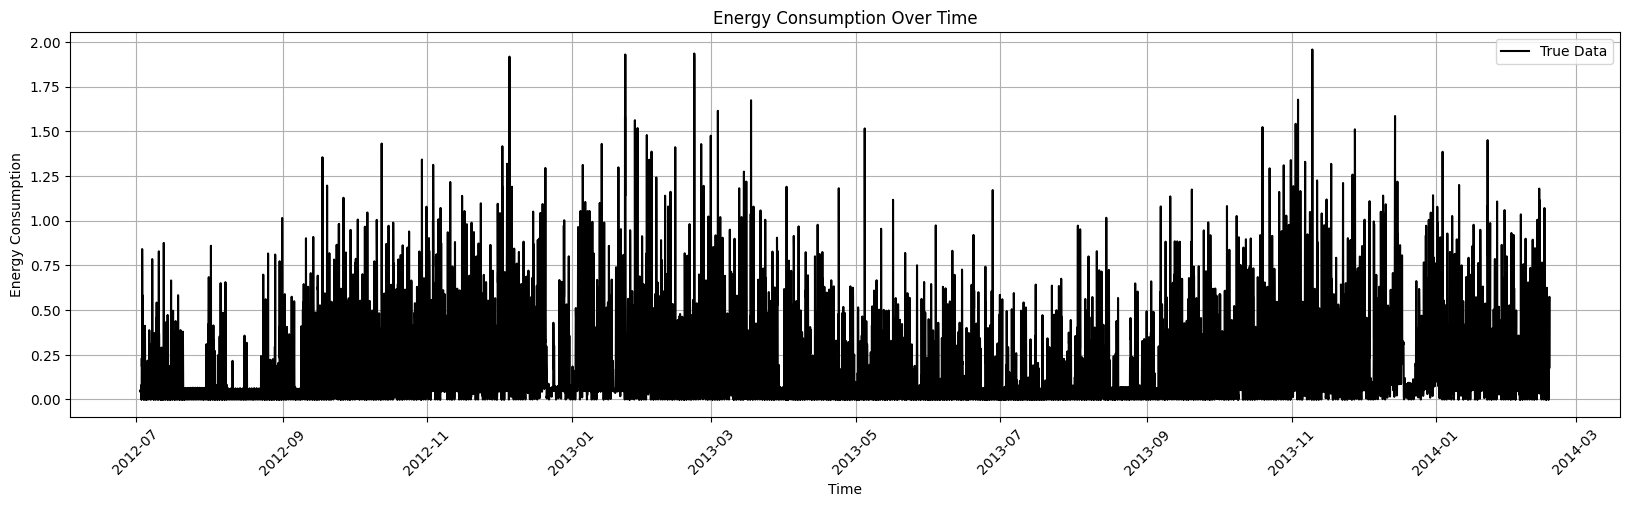

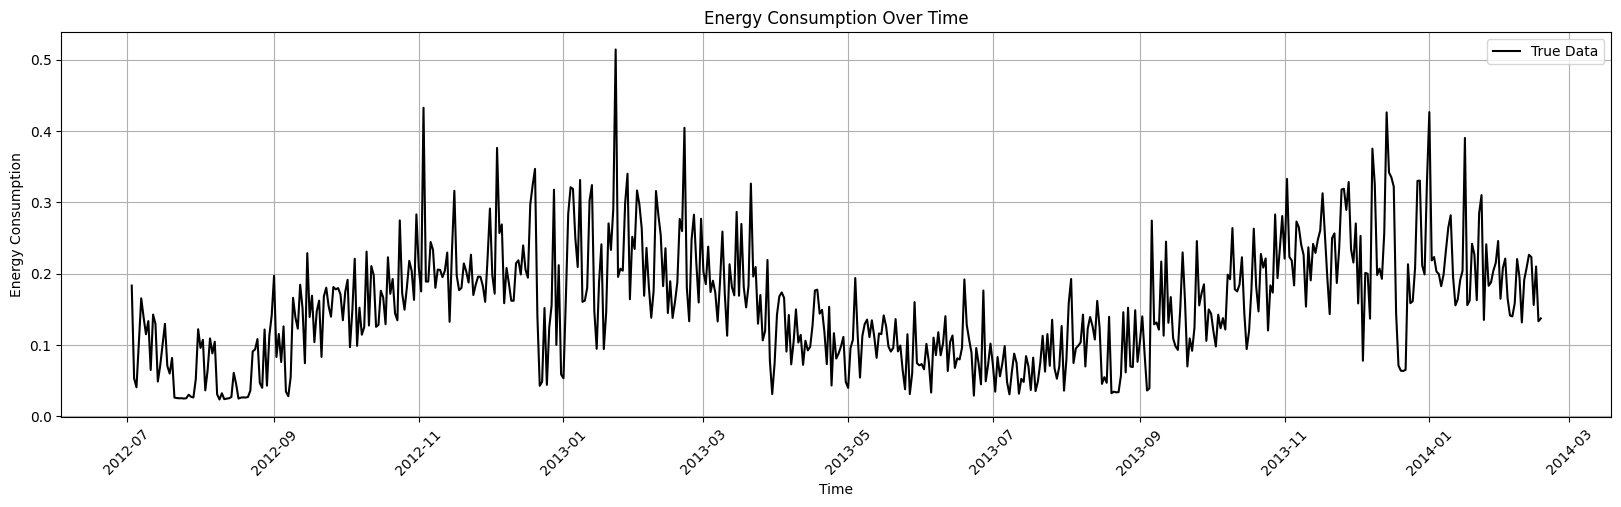

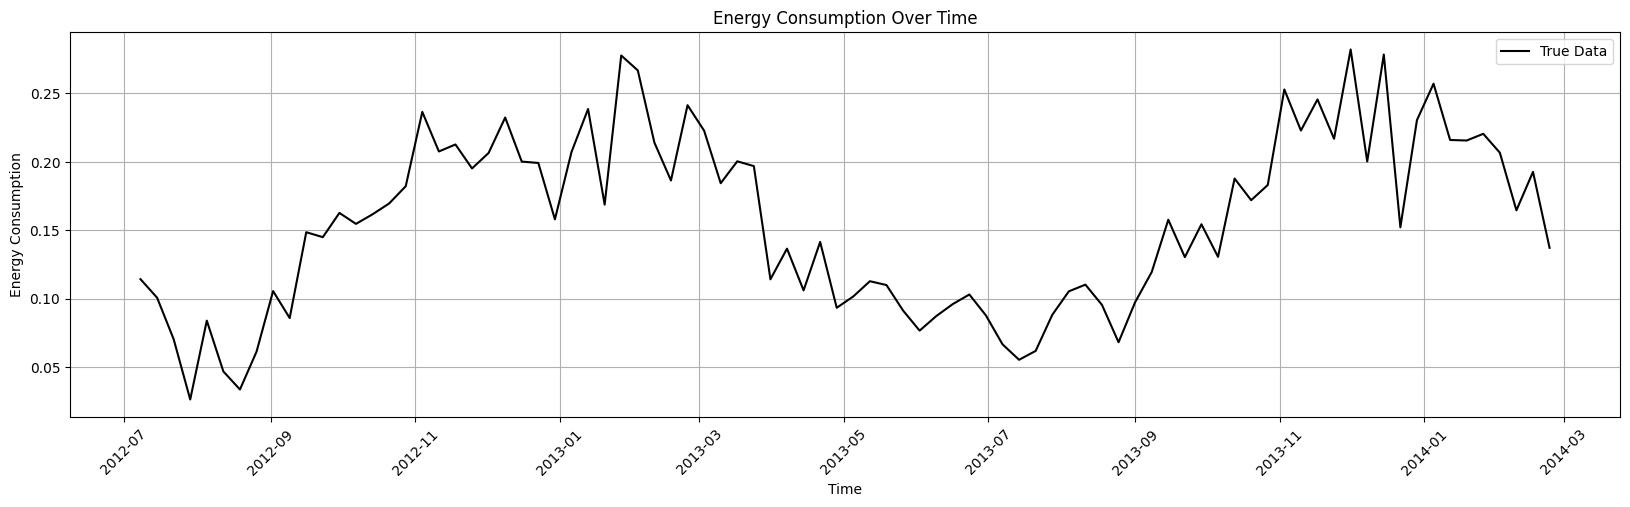

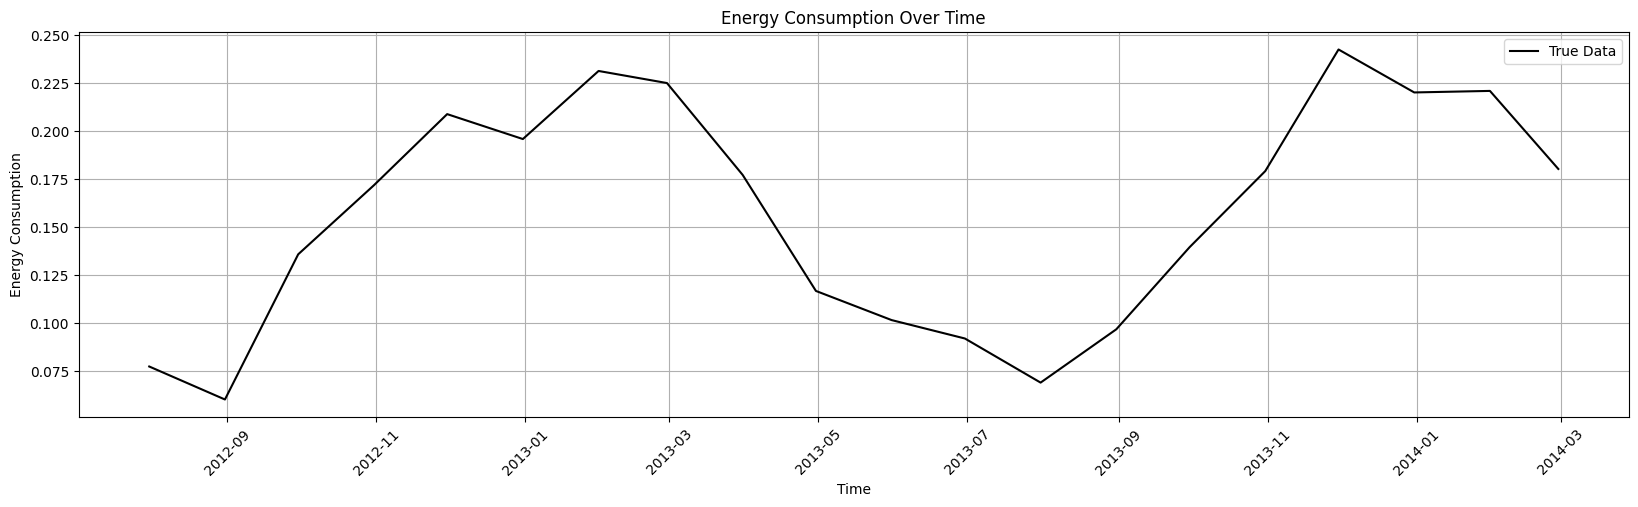

In [53]:
hourly_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('H')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(hourly_df)

daily_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('D')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(daily_df)

weekly_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('W')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(weekly_df)

monthly_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('M')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(monthly_df)


In [54]:
def plot_training_test_data(training_data, test_data):
    plt.figure(figsize=(20,5))
    plt.plot(training_data['timestamp'], training_data['energy_consumption'], label='Training Data', color='blue')
    plt.plot(test_data['timestamp'], test_data['energy_consumption'], label='Test Data', color='green')

    plt.title('Energy Consumption Over Time')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# **Time Delay Embedding**

## **Hourly Data**

### *Splitting*

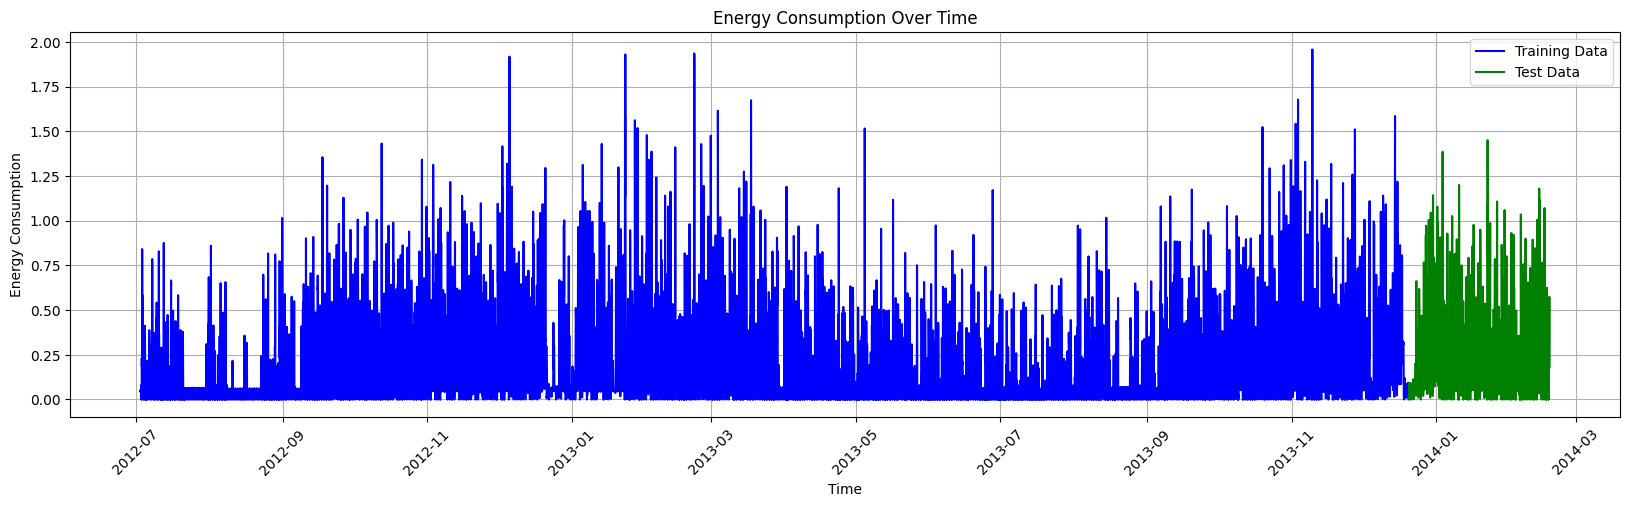

In [55]:
tr_hr = hourly_df[:int(len(hourly_df)*0.9)]
test_hr = hourly_df[int(len(hourly_df)*0.9):]

plot_training_test_data(tr_hr, test_hr)

In [56]:
tr_hr.drop(columns=['LCLid'], inplace=True)
tr_hr.set_index('timestamp', inplace=True)

In [57]:
tr_hr

energy_consumption
timestamp                              
2012-07-03 00:00:00              0.0445
2012-07-03 01:00:00              0.0525
2012-07-03 02:00:00              0.0535
2012-07-03 03:00:00              0.0430
2012-07-03 04:00:00              0.0550
...                                 ...
2013-12-20 07:00:00              0.0935
2013-12-20 08:00:00              0.0685
2013-12-20 09:00:00              0.0730
2013-12-20 10:00:00              0.0040
2013-12-20 11:00:00              0.0005

[12852 rows x 1 columns]

In [58]:
taw = 1
tr_hr['lag1'] = tr_hr['energy_consumption'].shift(taw)
tr_hr['lag2'] = tr_hr['lag1'].shift(taw)
tr_hr.dropna(inplace=True)
tr_hr.rename(columns={'energy_consumption':'target'}, inplace=True)
tr_hr

target    lag1    lag2
timestamp                                  
2012-07-03 02:00:00  0.0535  0.0525  0.0445
2012-07-03 03:00:00  0.0430  0.0535  0.0525
2012-07-03 04:00:00  0.0550  0.0430  0.0535
2012-07-03 05:00:00  0.0450  0.0550  0.0430
2012-07-03 06:00:00  0.0370  0.0450  0.0550
...                     ...     ...     ...
2013-12-20 07:00:00  0.0935  0.0775  0.0785
2013-12-20 08:00:00  0.0685  0.0935  0.0775
2013-12-20 09:00:00  0.0730  0.0685  0.0935
2013-12-20 10:00:00  0.0040  0.0730  0.0685
2013-12-20 11:00:00  0.0005  0.0040  0.0730

[12850 rows x 3 columns]

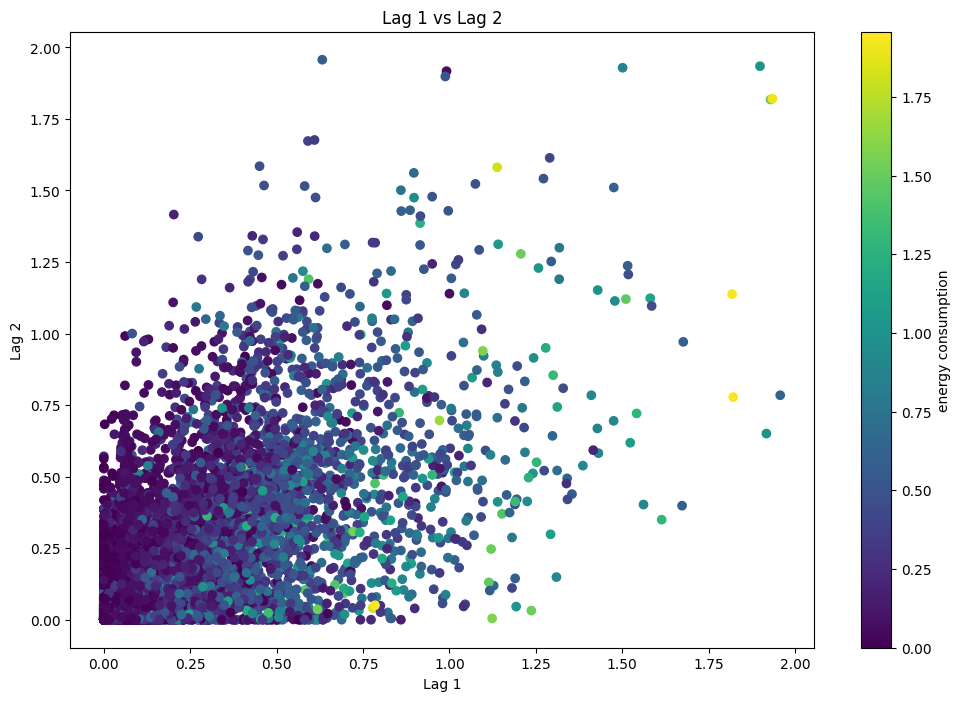

In [59]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_hr['lag1'], tr_hr['lag2'], c=tr_hr['target'], cmap='viridis')
ax.set_title('Lag 1 vs Lag 2')
ax.set_xlabel('Lag 1')
ax.set_ylabel('Lag 2')
fig.colorbar(scatter, label='energy consumption')
plt.show()

Not much of an insight here. We can try to target vs lag2

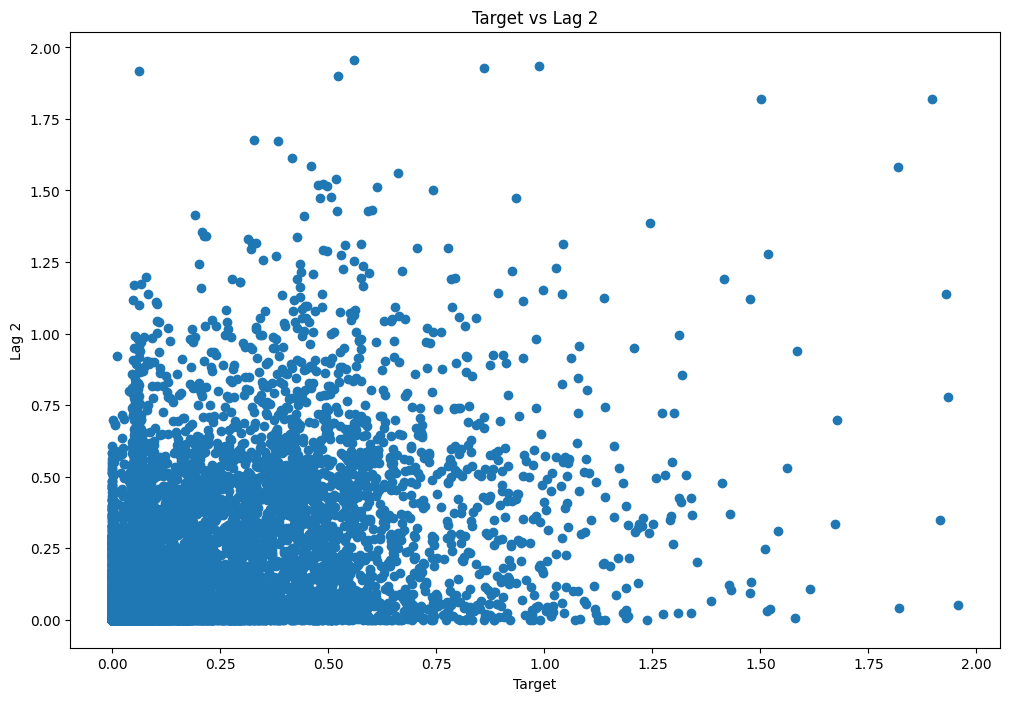

In [60]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_hr['target'], tr_hr['lag2'])
ax.set_title('Target vs Lag 2')
ax.set_xlabel('Target')
ax.set_ylabel('Lag 2')
plt.show()

No clear insight here as well from the plot. From earlier assignments we know that the data can be stationary after differencing by 1. But we will try to model the adat as it is right now.

### *Modelling*

In [61]:
X = tr_hr[['lag1', 'lag2']]
y = tr_hr['target']

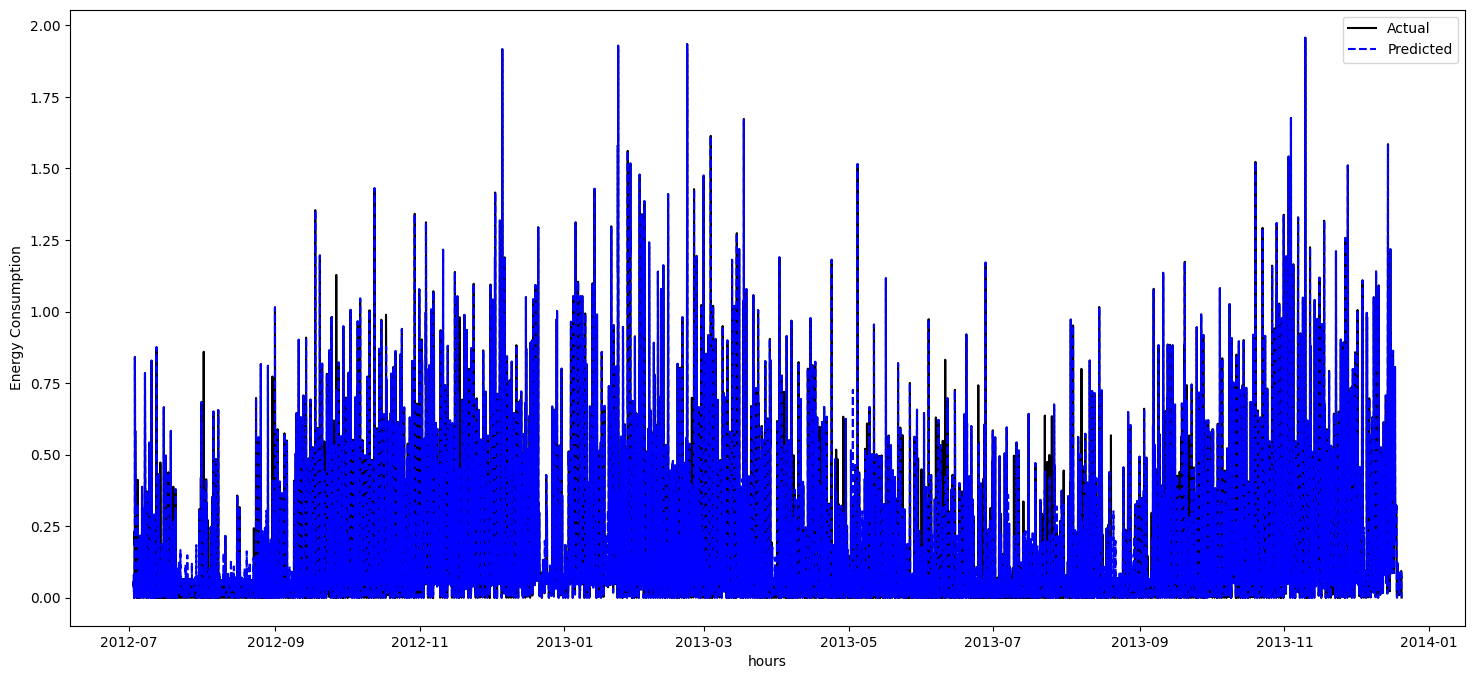

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=False)
rf_model.fit(X, y)
tr_hr['pred'] = rf_model.predict(X)
fig, ax= plt.subplots(1, 1, figsize=(18, 8))
ax.plot(tr_hr.index, tr_hr['target'], label='Actual', color='black')
ax.plot(tr_hr.index, tr_hr['pred'], label='Predicted', color='blue', linestyle='--')
ax.set_xlabel('hours')
ax.set_ylabel('Energy Consumption')
ax.legend()
plt.show()


In [63]:
# Training Error
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
def print_metrics(y_true, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_true, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error:', root_mean_squared_error(y_true, y_pred))
    print('R2 Score:', r2_score(y_true, y_pred))

print_metrics(tr_hr['target'], tr_hr['pred'])

Mean Absolute Error: 0.015478190824460584
Mean Squared Error: 0.002578903400789336
Root Mean Squared Error: 0.05078290461158495
R2 Score: 0.9482331227743824


Training error numbers seem good, high R2 score and low RMSE, let's try to predict the test data

### *Validation*

In [64]:
X[-1:]

lag1   lag2
timestamp                        
2013-12-20 11:00:00  0.004  0.073

In [65]:
def predict_future(model, X, test_df, freq='H'):
    last_row = X.iloc[-1].values.reshape(1, -1)
    predictions = []
    steps = len(test_df)
    dates = pd.date_range(start=X.index[-1], periods=steps + 1, freq=freq)[1:]

    prev_lag1 = last_row[0, 0]
    for _ in range(steps):
        pred = model.predict(last_row)[0]
        predictions.append(pred)
        last_row = np.array([[pred, prev_lag1]])
        prev_lag1 = pred

    pred_df = pd.DataFrame(predictions, columns=['pred'], index=dates)
    X_pred = pd.concat([X, pred_df], axis=0).sort_index()
    
    return X_pred

In [66]:
X_pred = predict_future(rf_model, X, test_hr)

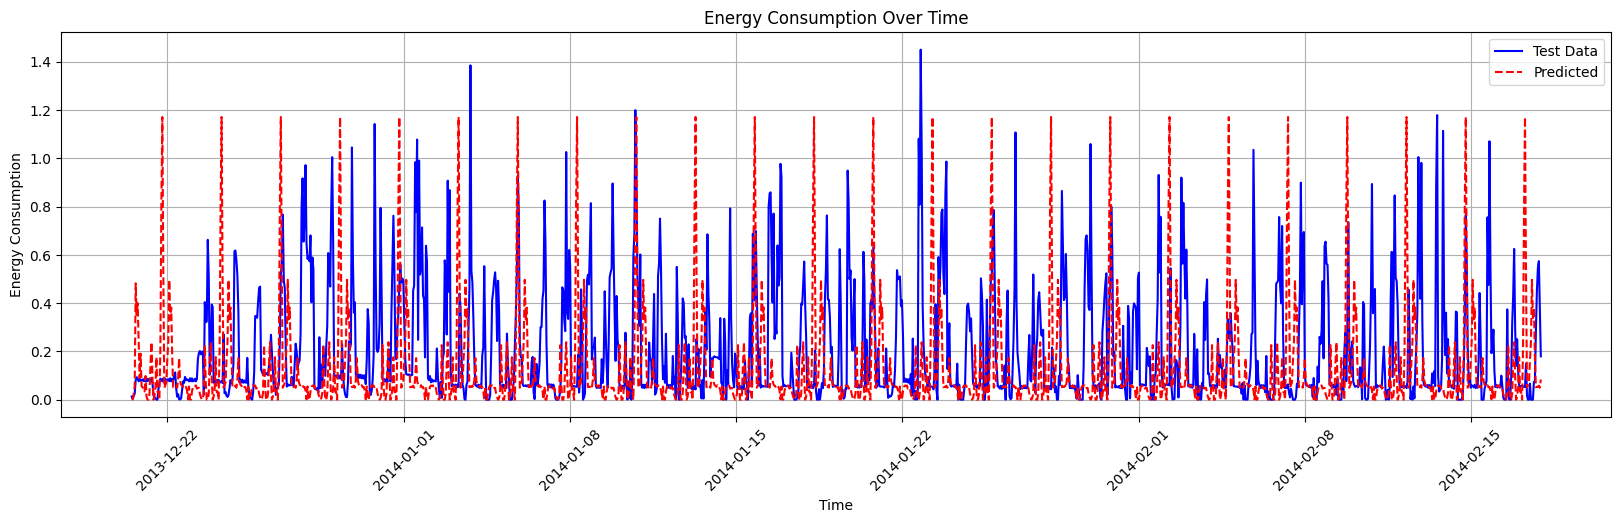

In [67]:
def plot_testdata_vs_future(test_df, X_pred):
    test_data = test_df.copy()
    test_data.set_index('timestamp', inplace=True)
    plt.figure(figsize=(20,5))
    plt.plot(test_data.index, test_data['energy_consumption'], label='Test Data', color='blue')
    plt.plot(X_pred.index, X_pred['pred'], label='Predicted', color='red', linestyle='--')
    plt.title('Energy Consumption Over Time')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
plot_testdata_vs_future(test_hr, X_pred)

In [68]:
print_metrics(test_hr['energy_consumption'], X_pred['pred'][-len(test_hr):])

Mean Absolute Error: 0.20865013896229712
Mean Squared Error: 0.10088615391763239
Root Mean Squared Error: 0.31762580801570955
R2 Score: -0.8072049807943238


R2 score is really not good here. Though the RMSE is lower than expected.

## **Daily Data**

### *Splitting*

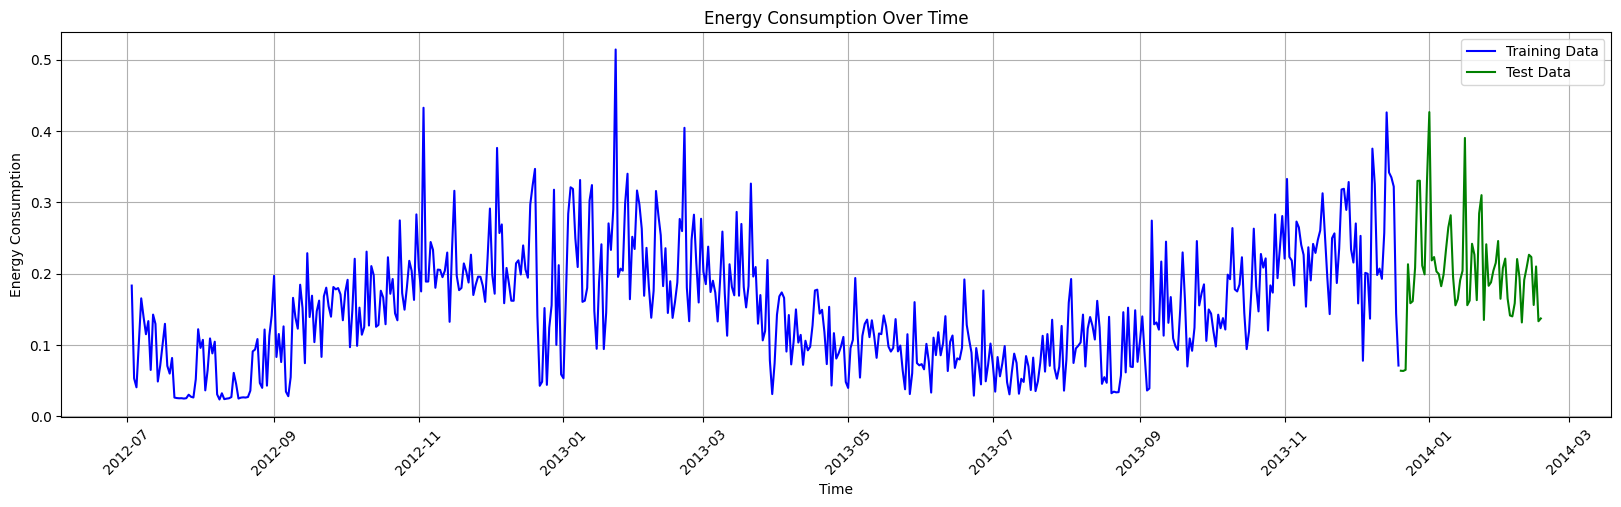

In [69]:
tr_daily = daily_df[:int(len(daily_df)*0.9)]
test_daily = daily_df[int(len(daily_df)*0.9):]

plot_training_test_data(tr_daily, test_daily)

In [70]:
tr_daily.drop(columns=['LCLid'], inplace=True)
tr_daily.set_index('timestamp', inplace=True)

In [71]:
tr_daily

energy_consumption
timestamp                     
2012-07-03              0.1832
2012-07-04              0.0531
2012-07-05              0.0406
2012-07-06              0.1043
2012-07-07              0.1653
...                        ...
2013-12-15              0.3418
2013-12-16              0.3349
2013-12-17              0.3220
2013-12-18              0.1441
2013-12-19              0.0711

[535 rows x 1 columns]

In [72]:
taw = 1
tr_daily['lag1'] = tr_daily['energy_consumption'].shift(taw)
tr_daily['lag2'] = tr_daily['lag1'].shift(taw)
tr_daily.dropna(inplace=True)
tr_daily.rename(columns={'energy_consumption':'target'}, inplace=True)
tr_daily

target    lag1    lag2
timestamp                         
2012-07-05  0.0406  0.0531  0.1832
2012-07-06  0.1043  0.0406  0.0531
2012-07-07  0.1653  0.1043  0.0406
2012-07-08  0.1389  0.1653  0.1043
2012-07-09  0.1150  0.1389  0.1653
...            ...     ...     ...
2013-12-15  0.3418  0.4260  0.2571
2013-12-16  0.3349  0.3418  0.4260
2013-12-17  0.3220  0.3349  0.3418
2013-12-18  0.1441  0.3220  0.3349
2013-12-19  0.0711  0.1441  0.3220

[533 rows x 3 columns]

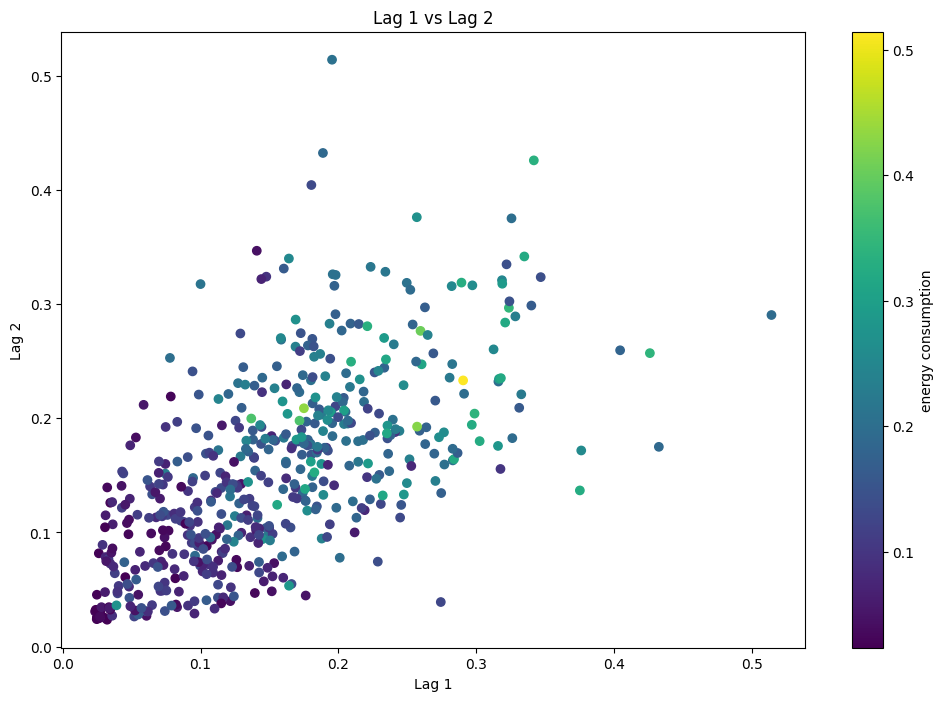

In [73]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_daily['lag1'], tr_daily['lag2'], c=tr_daily['target'], cmap='viridis')
ax.set_title('Lag 1 vs Lag 2')
ax.set_xlabel('Lag 1')
ax.set_ylabel('Lag 2')
fig.colorbar(scatter, label='energy consumption')
plt.show()

There seems to be a linear relationship here. We can try to plot target vs lag2

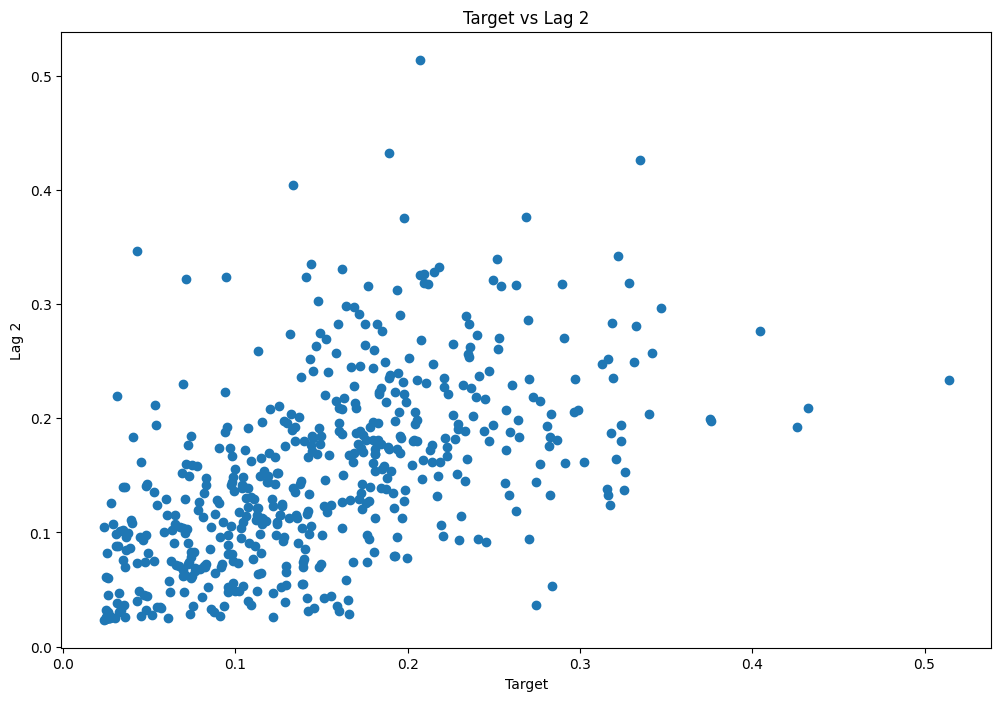

In [74]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_daily['target'], tr_daily['lag2'])
ax.set_title('Target vs Lag 2')
ax.set_xlabel('Target')
ax.set_ylabel('Lag 2')
plt.show()

Somehow a linear relationship here too.

### *Modelling*

In [75]:
X = tr_daily[['lag1', 'lag2']]
y = tr_daily['target']

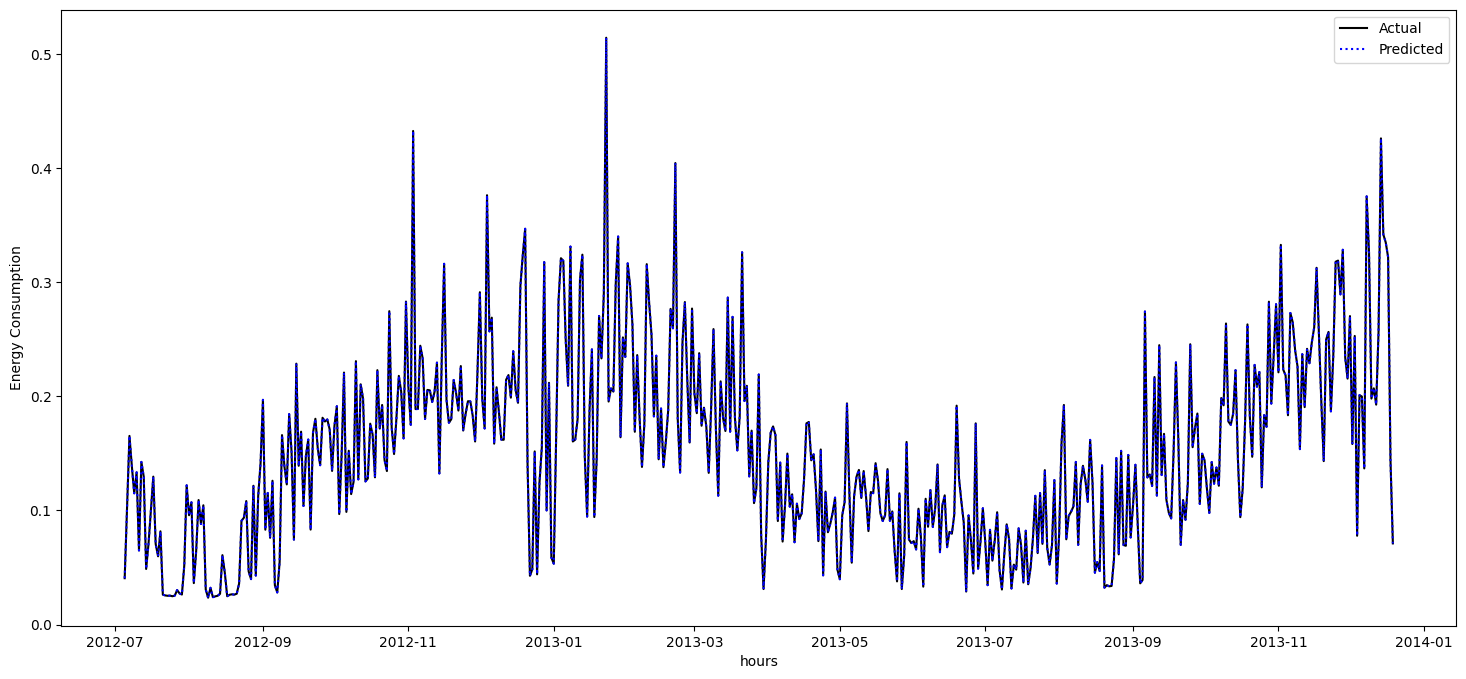

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=False)
rf_model.fit(X, y)
tr_daily['pred'] = rf_model.predict(X)
fig, ax= plt.subplots(1, 1, figsize=(18, 8))
ax.plot(tr_daily.index, tr_daily['target'], label='Actual', color='black')
ax.plot(tr_daily.index, tr_daily['pred'], label='Predicted', color='blue', linestyle=':')
ax.set_xlabel('hours')
ax.set_ylabel('Energy Consumption')
ax.legend()
plt.show()


In [77]:
# Training Error
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
def print_metrics(y_true, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_true, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error:', root_mean_squared_error(y_true, y_pred))
    print('R2 Score:', r2_score(y_true, y_pred))

print_metrics(tr_daily['target'], tr_daily['pred'])

Mean Absolute Error: 1.8108820676050572e-16
Mean Squared Error: 5.611095718416034e-32
Root Mean Squared Error: 2.3687751515110154e-16
R2 Score: 1.0


Training error numbers seem extraordinarily perfect (that might be overfitting), high R2 score and low RMSE, let's try to predict the test data

### *Validation*

In [78]:
len(test_daily)

60

In [79]:
X_pred = predict_future(rf_model, X, test_daily, freq='D')

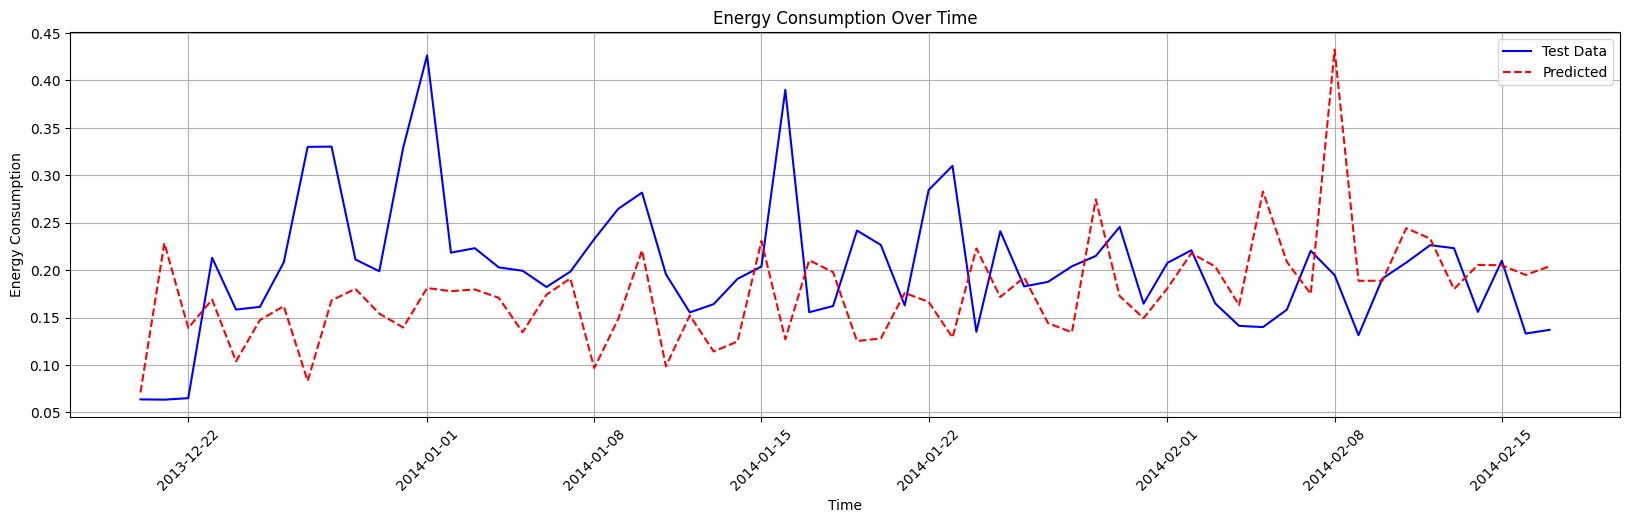

In [80]:

plot_testdata_vs_future(test_daily, X_pred)

In [81]:
print_metrics(test_daily['energy_consumption'], X_pred['pred'][-len(test_daily):])

Mean Absolute Error: 0.07136166666666663
Mean Squared Error: 0.009357939166666662
Root Mean Squared Error: 0.09673644177178868
R2 Score: -1.0318764101293771


R2 score is discouragingly bad. Though the RMSE is not that bad, it can be better. This model is not a good predictor.

## **Weekly Data**

### *Splitting*

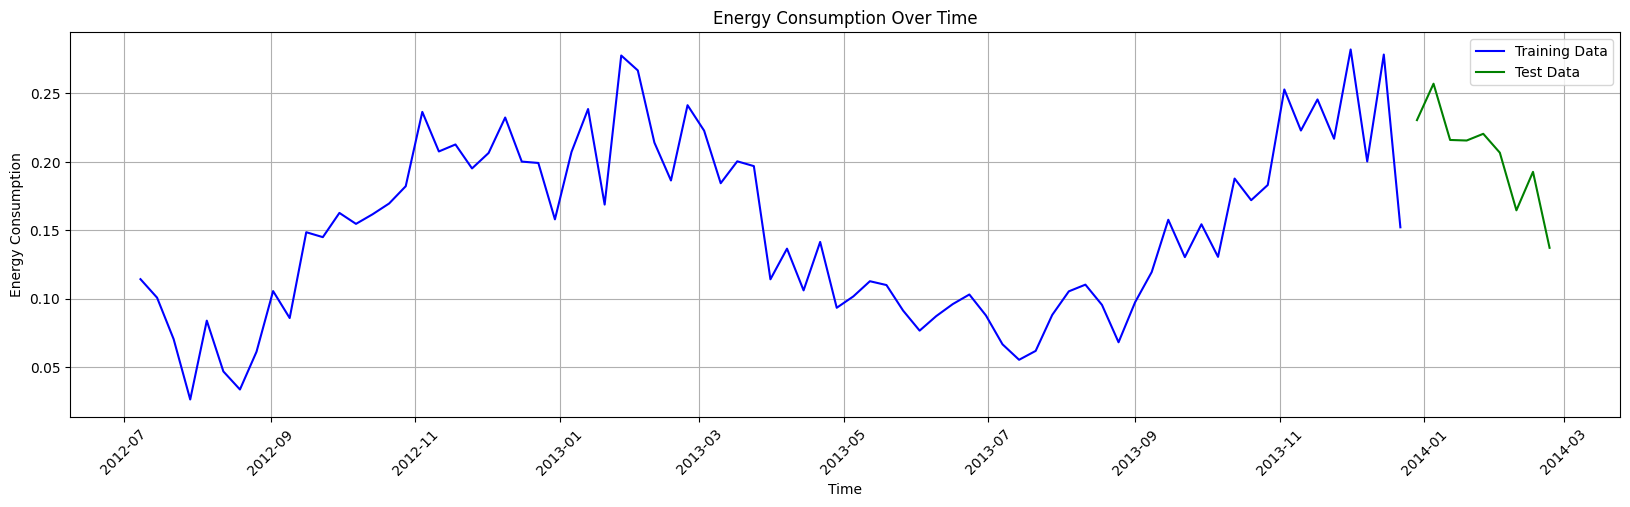

In [82]:
tr_weekly = weekly_df[:int(len(weekly_df)*0.9)]
test_weekly = weekly_df[int(len(weekly_df)*0.9):]
plot_training_test_data(tr_weekly, test_weekly)

In [83]:
tr_weekly.drop(columns=['LCLid'], inplace=True)
tr_weekly.set_index('timestamp', inplace=True)

In [84]:
tr_weekly

energy_consumption
timestamp                     
2012-07-08              0.1142
2012-07-15              0.1007
2012-07-22              0.0704
2012-07-29              0.0263
2012-08-05              0.0839
...                        ...
2013-11-24              0.2168
2013-12-01              0.2820
2013-12-08              0.2002
2013-12-15              0.2783
2013-12-22              0.1521

[77 rows x 1 columns]

In [85]:
taw = 1
tr_weekly['lag1'] = tr_weekly['energy_consumption'].shift(taw)
tr_weekly['lag2'] = tr_weekly['lag1'].shift(taw)
tr_weekly.dropna(inplace=True)
tr_weekly.rename(columns={'energy_consumption':'target'}, inplace=True)
tr_weekly

target    lag1    lag2
timestamp                         
2012-07-22  0.0704  0.1007  0.1142
2012-07-29  0.0263  0.0704  0.1007
2012-08-05  0.0839  0.0263  0.0704
2012-08-12  0.0468  0.0839  0.0263
2012-08-19  0.0336  0.0468  0.0839
...            ...     ...     ...
2013-11-24  0.2168  0.2455  0.2228
2013-12-01  0.2820  0.2168  0.2455
2013-12-08  0.2002  0.2820  0.2168
2013-12-15  0.2783  0.2002  0.2820
2013-12-22  0.1521  0.2783  0.2002

[75 rows x 3 columns]

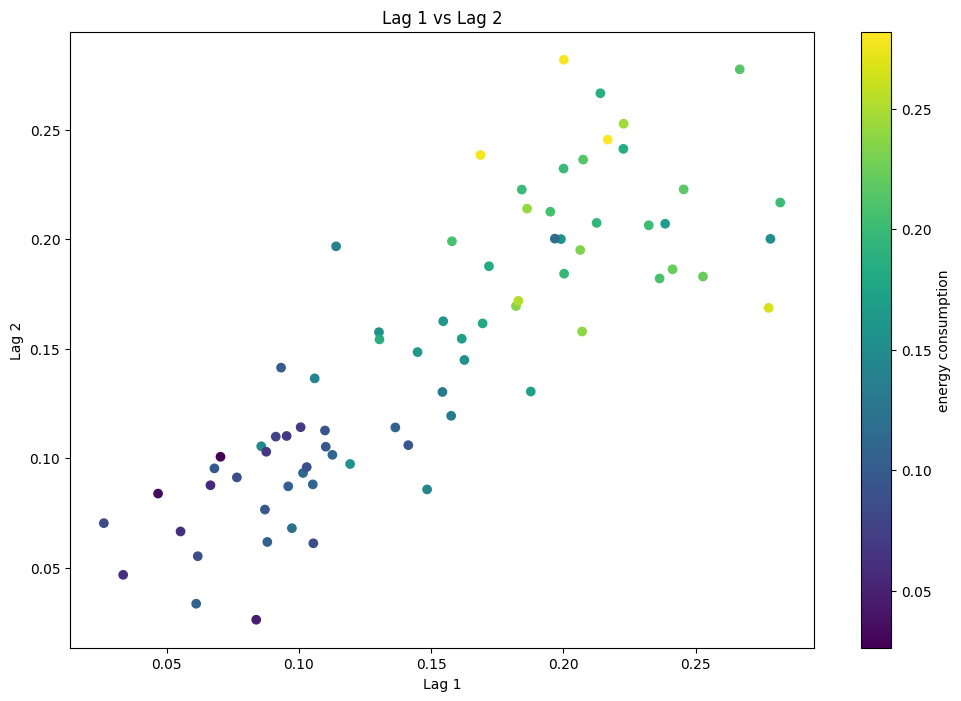

In [86]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_weekly['lag1'], tr_weekly['lag2'], c=tr_weekly['target'], cmap='viridis')
ax.set_title('Lag 1 vs Lag 2')
ax.set_xlabel('Lag 1')
ax.set_ylabel('Lag 2')
fig.colorbar(scatter, label='energy consumption')
plt.show()

There is a clear linear relationship here. We can try to plot target vs lag2

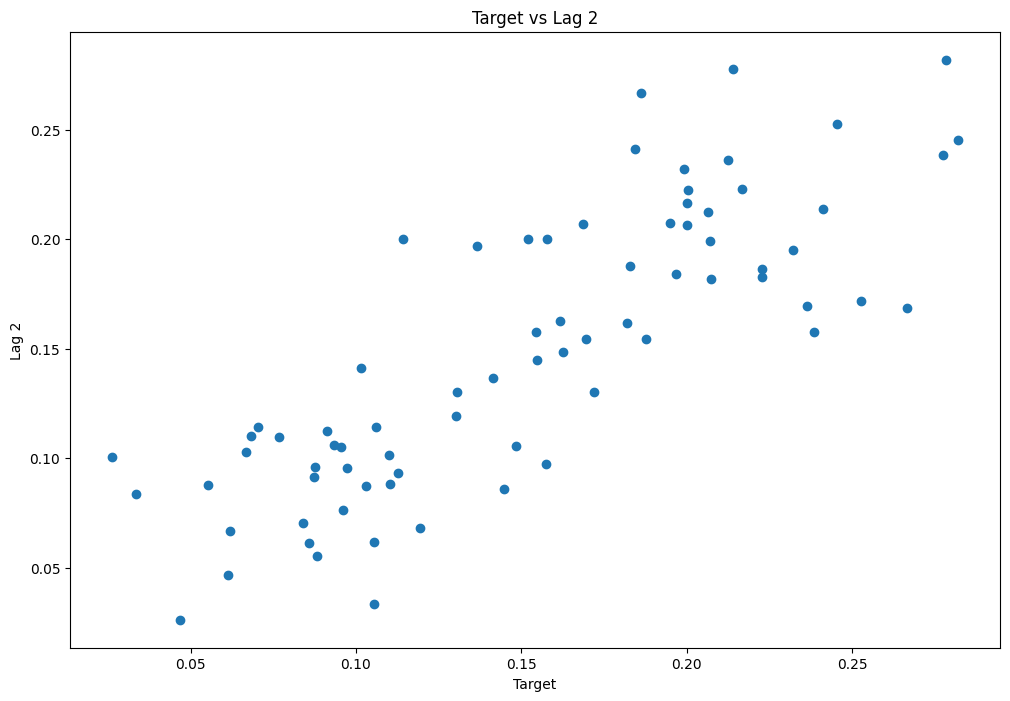

In [87]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_weekly['target'], tr_weekly['lag2'])
ax.set_title('Target vs Lag 2')
ax.set_xlabel('Target')
ax.set_ylabel('Lag 2')
plt.show()

Again a clear linear relationship here too.

### *Modelling*

In [88]:
X = tr_weekly[['lag1', 'lag2']]
y = tr_weekly['target']

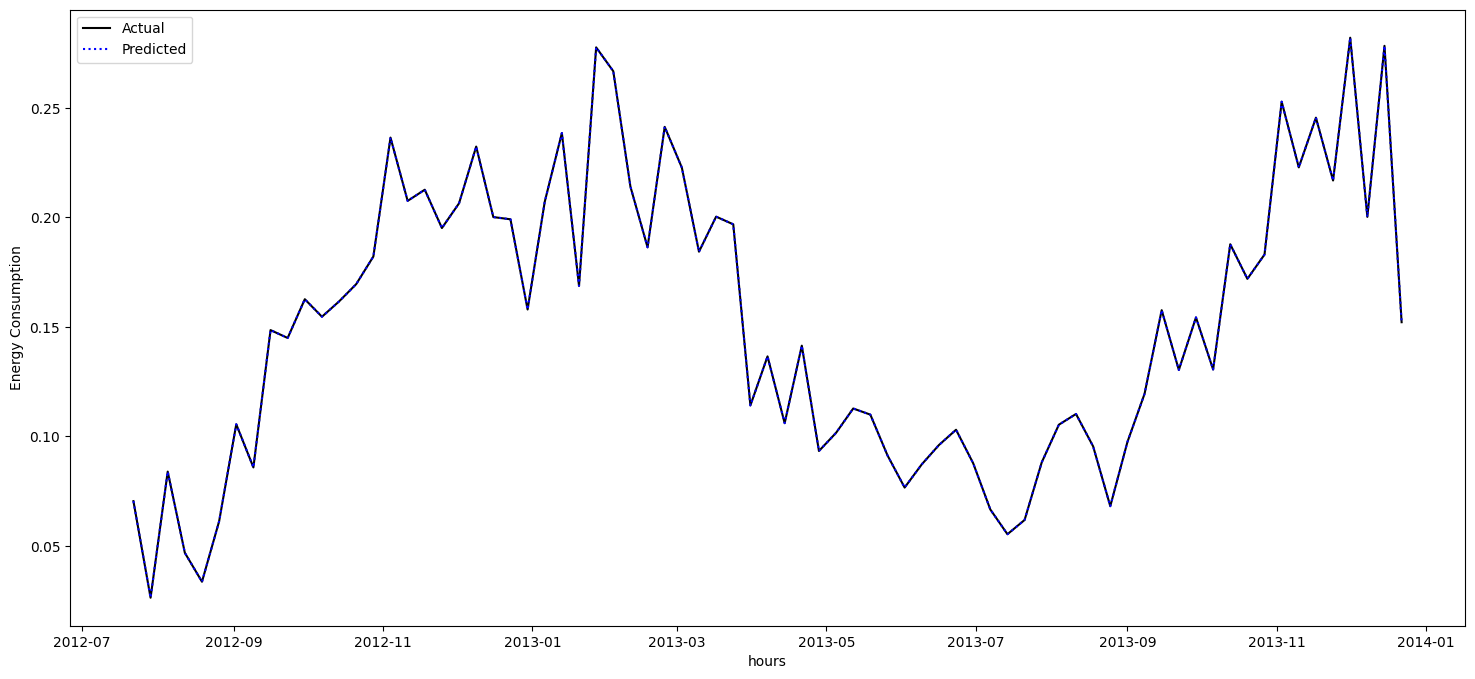

In [89]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=False)
rf_model.fit(X, y)
tr_weekly['pred'] = rf_model.predict(X)
fig, ax= plt.subplots(1, 1, figsize=(18, 8))
ax.plot(tr_weekly.index, tr_weekly['target'], label='Actual', color='black')
ax.plot(tr_weekly.index, tr_weekly['pred'], label='Predicted', color='blue', linestyle=':')
ax.set_xlabel('hours')
ax.set_ylabel('Energy Consumption')
ax.legend()
plt.show()


In [90]:
print_metrics(tr_weekly['target'], tr_weekly['pred'])

Mean Absolute Error: 1.6579330501069005e-16
Mean Squared Error: 4.28057189439507e-32
Root Mean Squared Error: 2.0689542997357555e-16
R2 Score: 1.0


Training error numbers are again extraordinarily perfect (overfitting), high R2 score and low RMSE, let's try to predict the test data

### *Validation*

In [91]:
len(test_weekly)

9

In [92]:
X_pred = predict_future(rf_model, X, test_weekly, freq='W')

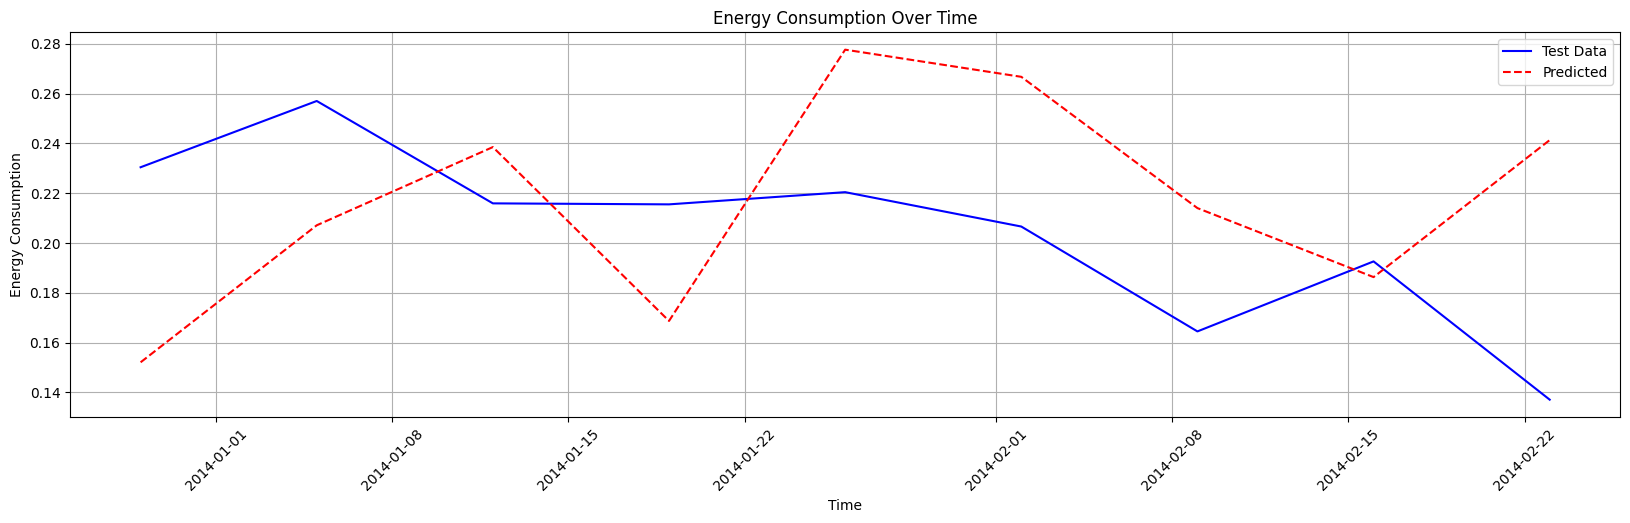

In [93]:
plot_testdata_vs_future(test_weekly, X_pred)

In [94]:
print_metrics(test_weekly['energy_consumption'], X_pred['pred'][-len(test_weekly):])

Mean Absolute Error: 0.05276666666666656
Mean Squared Error: 0.00350592555555554
Root Mean Squared Error: 0.05921085673721957
R2 Score: -2.0875361941301223


Same case as the daily testing data. Model is not a good predictor due to trend and seasonality.

## **Monthly Data**

### *Splitting*

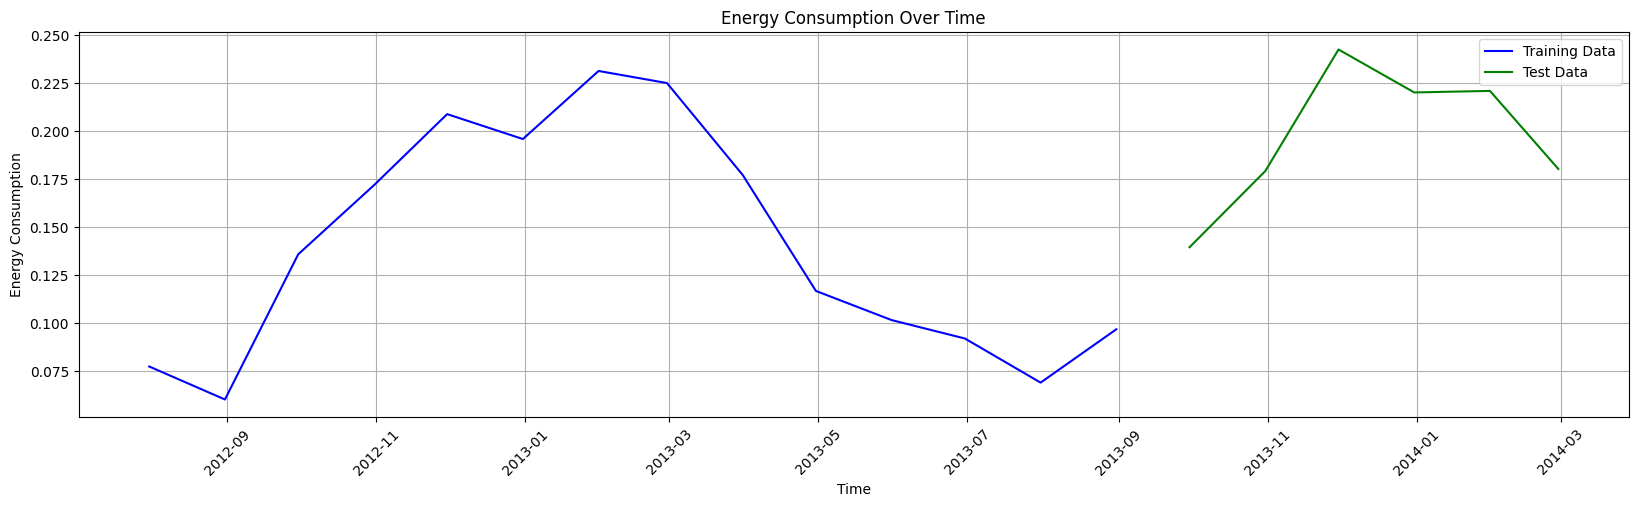

energy_consumption
timestamp                     
2012-07-31              0.0773
2012-08-31              0.0601
2012-09-30              0.1358
2012-10-31              0.1718
2012-11-30              0.2089
2012-12-31              0.1959
2013-01-31              0.2314
2013-02-28              0.2251
2013-03-31              0.1772
2013-04-30              0.1167
2013-05-31              0.1015
2013-06-30              0.0919
2013-07-31              0.0689
2013-08-31              0.0967

In [95]:
tr_monthly = monthly_df[:int(len(monthly_df)*0.7)]
test_monthly = monthly_df[int(len(monthly_df)*0.7):]
plot_training_test_data(tr_monthly, test_monthly)
tr_monthly.drop(columns=['LCLid'], inplace=True)
tr_monthly.set_index('timestamp', inplace=True)
tr_monthly


In [96]:
taw = 1
tr_monthly['lag1'] = tr_monthly['energy_consumption'].shift(taw)
tr_monthly['lag2'] = tr_monthly['lag1'].shift(taw)
tr_monthly.dropna(inplace=True)
tr_monthly.rename(columns={'energy_consumption':'target'}, inplace=True)
tr_monthly

target    lag1    lag2
timestamp                         
2012-09-30  0.1358  0.0601  0.0773
2012-10-31  0.1718  0.1358  0.0601
2012-11-30  0.2089  0.1718  0.1358
2012-12-31  0.1959  0.2089  0.1718
2013-01-31  0.2314  0.1959  0.2089
2013-02-28  0.2251  0.2314  0.1959
2013-03-31  0.1772  0.2251  0.2314
2013-04-30  0.1167  0.1772  0.2251
2013-05-31  0.1015  0.1167  0.1772
2013-06-30  0.0919  0.1015  0.1167
2013-07-31  0.0689  0.0919  0.1015
2013-08-31  0.0967  0.0689  0.0919

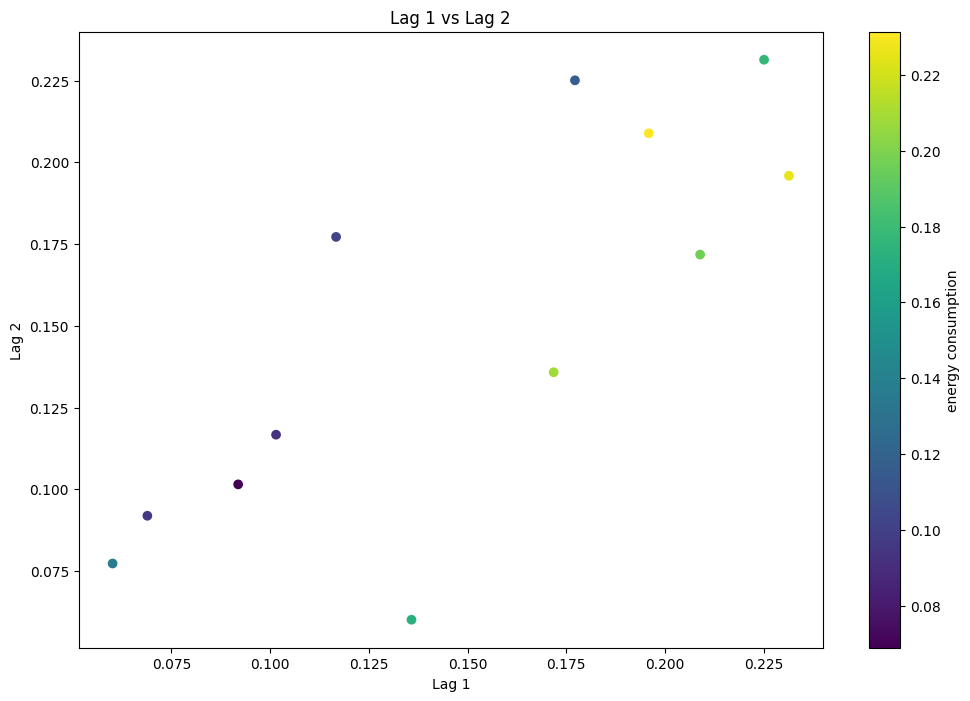

In [97]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_monthly['lag1'], tr_monthly['lag2'], c=tr_monthly['target'], cmap='viridis')
ax.set_title('Lag 1 vs Lag 2')
ax.set_xlabel('Lag 1')
ax.set_ylabel('Lag 2')
fig.colorbar(scatter, label='energy consumption')
plt.show()

Data points are small in number, but we can see kind of a linear relationship as the case of daily and weekly data

### *Modelling*

In [98]:
X = tr_monthly[['lag1', 'lag2']]
y = tr_monthly['target']

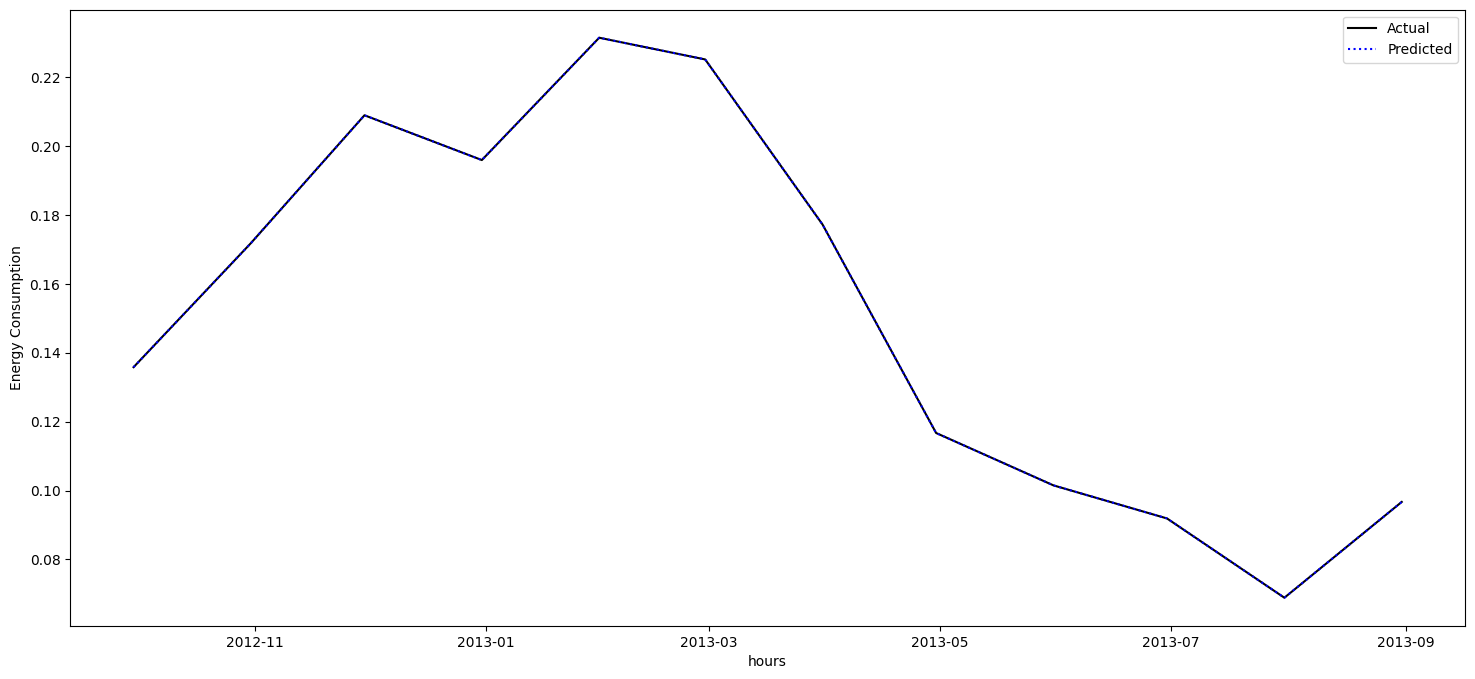

In [99]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=False)
rf_model.fit(X, y)
tr_monthly['pred'] = rf_model.predict(X)
fig, ax= plt.subplots(1, 1, figsize=(18, 8))
ax.plot(tr_monthly.index, tr_monthly['target'], label='Actual', color='black')
ax.plot(tr_monthly.index, tr_monthly['pred'], label='Predicted', color='blue', linestyle=':')
ax.set_xlabel('hours')
ax.set_ylabel('Energy Consumption')
ax.legend()
plt.show()


In [100]:
print_metrics(tr_monthly['target'], tr_monthly['pred'])

Mean Absolute Error: 2.0816681711721685e-16
Mean Squared Error: 6.11803745667012e-32
Root Mean Squared Error: 2.4734666880049383e-16
R2 Score: 1.0


Training error numbers are again extraordinarily perfect (overfitting), high R2 score and low RMSE, let's try to predict the test data

### *Validation*

In [101]:
len(test_monthly)

6

In [102]:
X_pred = predict_future(rf_model, X, test_monthly, freq='M')

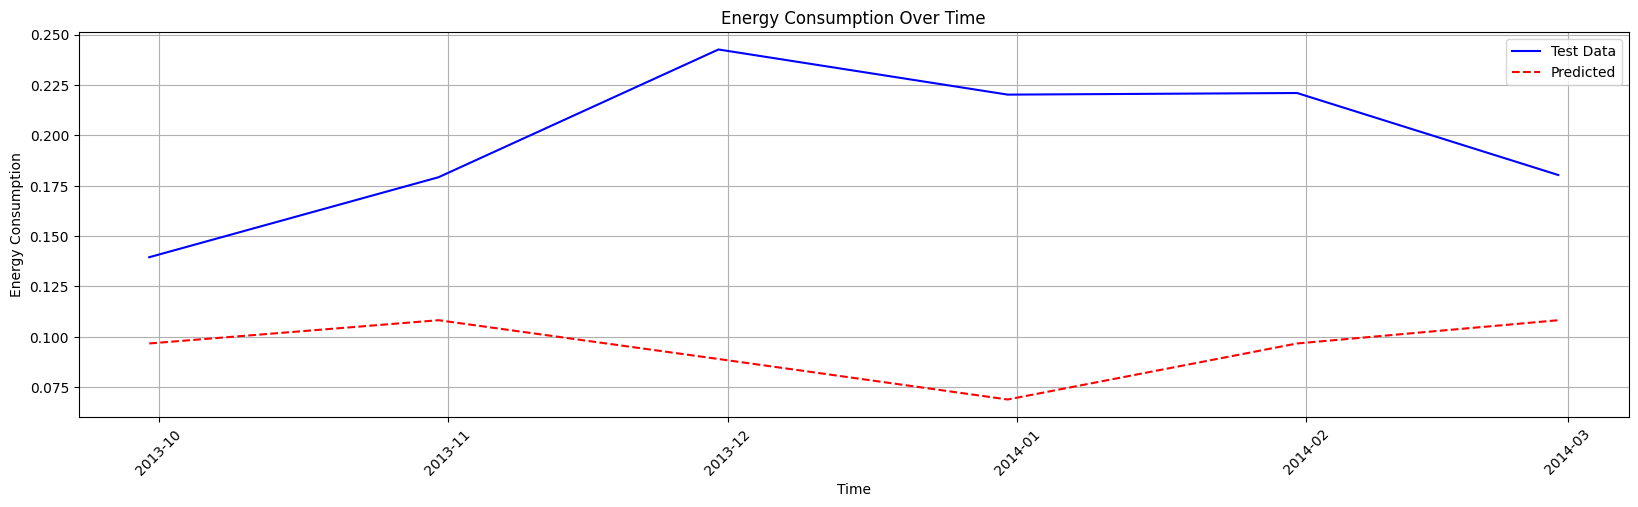

In [103]:
plot_testdata_vs_future(test_monthly, X_pred)

In [104]:
print_metrics(test_monthly['energy_consumption'], X_pred['pred'][-len(test_monthly):])

Mean Absolute Error: 0.10250366666666665
Mean Squared Error: 0.012332593267333325
Root Mean Squared Error: 0.11105220964633403
R2 Score: -9.428558621506099


Simply a bad model as the training data is too small and also the model in all precisions can't capture trend or seasonality components properly.

# **Temporal Embedding**

## **Hourly Data**

In [192]:
hourly_df.head()

LCLid           timestamp  energy_consumption
0  MAC002928 2012-07-03 00:00:00              0.0445
1  MAC002928 2012-07-03 01:00:00              0.0525
2  MAC002928 2012-07-03 02:00:00              0.0535
3  MAC002928 2012-07-03 03:00:00              0.0430
4  MAC002928 2012-07-03 04:00:00              0.0550

Prompt:Make a function where I pass a dataframe and a precision (hourly, daily, weekly, monthly). It should create cyclical features for the time columns, but make sure they start from 0 not 1. Then split into train and test with a ratio and rename energy_consumption to target/groundtruth.

In [ ]:
def create_train_test_split(df, precision='hourly', split_ratio=0.9):
    """
    Create cyclical temporal embeddings and split into train/test DataFrames.

    Args:
    - df (pd.DataFrame): Input data with 'timestamp' and 'energy_consumption' columns.
    - precision (str): 'hourly', 'daily', 'weekly', or 'monthly'.
    - split_ratio (float): Train/test split ratio (default 0.9).

    Returns:
    - train_df (pd.DataFrame): Training set with 'target'.
    - test_df (pd.DataFrame): Test set with 'groundtruth'.
    """
    df = df.copy()
    df = df.set_index('timestamp')

    # Always add year
    df['year'] = df.index.year - df.index.year.min()  # Normalize to start at 0
    max_year = df['year'].max() + 1                   # Period = (max-min)+1

    if precision == 'hourly':
        df['hour'] = df.index.hour
        df['dayofweek'] = df.index.dayofweek
        df['dayofmonth'] = df.index.day - 1
        df['month'] = df.index.month - 1
        cyclical_features = [
            ('hour', 24),
            ('dayofweek', 7),
            ('dayofmonth', 31),
            ('month', 12),
            ('year', max_year)
        ]
        
    elif precision == 'daily':
        df['dayofweek'] = df.index.dayofweek
        df['dayofmonth'] = df.index.day - 1
        df['month'] = df.index.month - 1
        cyclical_features = [
            ('dayofweek', 7),
            ('dayofmonth', 31),
            ('month', 12),
            ('year', max_year)
        ]
        
    elif precision == 'weekly':
        df['weekofyear'] = df.index.isocalendar().week - 1
        df['month'] = df.index.month - 1
        cyclical_features = [
            ('weekofyear', 52),
            ('month', 12),
            ('year', max_year)
        ]

    elif precision == 'monthly':
        df['month'] = df.index.month - 1
        cyclical_features = [
            ('month', 12),
            ('year', max_year)
        ]

    else:
        raise ValueError(f"Unsupported precision: {precision}. Choose from 'hourly', 'daily', 'weekly', or 'monthly'.")
    
    # Drop LCLid if it exists
    if 'LCLid' in df.columns:
        df.drop(columns=['LCLid'], inplace=True)
    
    # Add cyclical features
    for col, period in cyclical_features:
        df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / period)
        df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / period)
    
    # Drop original non-cyclical time features
    df.drop(columns=[col for col, _ in cyclical_features], inplace=True)

    # Split into train and test
    split_point = int(len(df) * split_ratio)
    train_df = df.iloc[:split_point].copy()
    test_df = df.iloc[split_point:].copy()
    
    # Rename energy consumption columns
    train_df.rename(columns={'energy_consumption': 'target'}, inplace=True)
    test_df.rename(columns={'energy_consumption': 'groundtruth'}, inplace=True)

    return train_df, test_df


In [194]:
train_df, test_df = create_train_test_split(hourly_df, precision='hourly', split_ratio=0.9)
train_df

target  hour_sin  hour_cos  dayofweek_sin  dayofweek_cos  \
timestamp                                                                       
2012-07-03 00:00:00  0.0445  0.000000  1.000000       0.781831       0.623490   
2012-07-03 01:00:00  0.0525  0.258819  0.965926       0.781831       0.623490   
2012-07-03 02:00:00  0.0535  0.500000  0.866025       0.781831       0.623490   
2012-07-03 03:00:00  0.0430  0.707107  0.707107       0.781831       0.623490   
2012-07-03 04:00:00  0.0550  0.866025  0.500000       0.781831       0.623490   
...                     ...       ...       ...            ...            ...   
2013-12-20 07:00:00  0.0935  0.965926 -0.258819      -0.433884      -0.900969   
2013-12-20 08:00:00  0.0685  0.866025 -0.500000      -0.433884      -0.900969   
2013-12-20 09:00:00  0.0730  0.707107 -0.707107      -0.433884      -0.900969   
2013-12-20 10:00:00  0.0040  0.500000 -0.866025      -0.433884      -0.900969   
2013-12-20 11:00:00  0.0005  0.258819 -0.965926      -0.433884      -0.900969   

                     dayofmonth_sin  dayofmonth_cos     month_sin  month_cos  \
timestamp                                                                      
2012-07-03 00:00:00        0.394356        0.918958  1.224647e-16  -1.000000   
2012-07-03 01:00:00        0.394356        0.918958  1.224647e-16  -1.000000   
2012-07-03 02:00:00        0.394356        0.918958  1.224647e-16  -1.000000   
2012-07-03 03:00:00        0.394356        0.918958  1.224647e-16  -1.000000   
2012-07-03 04:00:00        0.394356        0.918958  1.224647e-16  -1.000000   
...                             ...             ...           ...        ...   
2013-12-20 07:00:00       -0.651372       -0.758758 -5.000000e-01   0.866025   
2013-12-20 08:00:00       -0.651372       -0.758758 -5.000000e-01   0.866025   
2013-12-20 09:00:00       -0.651372       -0.758758 -5.000000e-01   0.866025   
2013-12-20 10:00:00       -0.651372       -0.758758 -5.000000e-01   0.866025   
2013-12-20 11:00:00       -0.651372       -0.758758 -5.000000e-01   0.866025   

                     year_sin  year_cos  
timestamp                                
2012-07-03 00:00:00  0.000000       1.0  
2012-07-03 01:00:00  0.000000       1.0  
2012-07-03 02:00:00  0.000000       1.0  
2012-07-03 03:00:00  0.000000       1.0  
2012-07-03 04:00:00  0.000000       1.0  
...                       ...       ...  
2013-12-20 07:00:00  0.866025      -0.5  
2013-12-20 08:00:00  0.866025      -0.5  
2013-12-20 09:00:00  0.866025      -0.5  
2013-12-20 10:00:00  0.866025      -0.5  
2013-12-20 11:00:00  0.866025      -0.5  

[12852 rows x 11 columns]

Prompt: Index(['target', 'hour_sin', 'hour_cos', 'dayofweek_sin', 'dayofweek_cos',
       'dayofmonth_sin', 'dayofmonth_cos', 'month_sin', 'month_cos'],
      dtype='object')

here are my columns of the dataframe
build me a Randomforest regressor without bootstrap to train on this time series and predict future function

In [195]:
def train_predict_randomforest(train_df, test_df):
    """
    Train a RandomForestRegressor on training data and predict targets on test data.
    
    Args:
    - train_df (pd.DataFrame): Training data with 'target' column.
    - test_df (pd.DataFrame): Test data with same features.
    
    Returns:
    - model (RandomForestRegressor): Trained model.
    - test_preds (np.array): Predictions for the test set.
    """
    # Define feature columns: all except 'target'
    feature_cols = [col for col in train_df.columns if col != 'target']
    target_col = 'target'
    
    X_train = train_df[feature_cols]
    y_train = train_df[target_col]
    
    X_test = test_df[feature_cols]
    
    # Initialize and train RandomForest
    model = RandomForestRegressor(
        n_estimators=100, 
        bootstrap=False, 
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Predict on the test set
    test_preds = model.predict(X_test)
    
    return model, test_preds


In [196]:
model, test_preds = train_predict_randomforest(train_df , test_df)

In [198]:
test_df

groundtruth      hour_sin  hour_cos  dayofweek_sin  \
timestamp                                                                 
2013-12-20 12:00:00       0.0130  1.224647e-16 -1.000000      -0.433884   
2013-12-20 13:00:00       0.0025 -2.588190e-01 -0.965926      -0.433884   
2013-12-20 14:00:00       0.0155 -5.000000e-01 -0.866025      -0.433884   
2013-12-20 15:00:00       0.0245 -7.071068e-01 -0.707107      -0.433884   
2013-12-20 16:00:00       0.0805 -8.660254e-01 -0.500000      -0.433884   
...                          ...           ...       ...            ...   
2014-02-17 19:00:00       0.4480 -9.659258e-01  0.258819       0.000000   
2014-02-17 20:00:00       0.5440 -8.660254e-01  0.500000       0.000000   
2014-02-17 21:00:00       0.5740 -7.071068e-01  0.707107       0.000000   
2014-02-17 22:00:00       0.3775 -5.000000e-01  0.866025       0.000000   
2014-02-17 23:00:00       0.1795 -2.588190e-01  0.965926       0.000000   

                     dayofweek_cos  dayofmonth_sin  dayofmonth_cos  month_sin  \
timestamp                                                                       
2013-12-20 12:00:00      -0.900969       -0.651372       -0.758758       -0.5   
2013-12-20 13:00:00      -0.900969       -0.651372       -0.758758       -0.5   
2013-12-20 14:00:00      -0.900969       -0.651372       -0.758758       -0.5   
2013-12-20 15:00:00      -0.900969       -0.651372       -0.758758       -0.5   
2013-12-20 16:00:00      -0.900969       -0.651372       -0.758758       -0.5   
...                            ...             ...             ...        ...   
2014-02-17 19:00:00       1.000000       -0.101168       -0.994869        0.5   
2014-02-17 20:00:00       1.000000       -0.101168       -0.994869        0.5   
2014-02-17 21:00:00       1.000000       -0.101168       -0.994869        0.5   
2014-02-17 22:00:00       1.000000       -0.101168       -0.994869        0.5   
2014-02-17 23:00:00       1.000000       -0.101168       -0.994869        0.5   

                     month_cos  year_sin  year_cos  
timestamp                                           
2013-12-20 12:00:00   0.866025  0.866025      -0.5  
2013-12-20 13:00:00   0.866025  0.866025      -0.5  
2013-12-20 14:00:00   0.866025  0.866025      -0.5  
2013-12-20 15:00:00   0.866025  0.866025      -0.5  
2013-12-20 16:00:00   0.866025  0.866025      -0.5  
...                        ...       ...       ...  
2014-02-17 19:00:00   0.866025 -0.866025      -0.5  
2014-02-17 20:00:00   0.866025 -0.866025      -0.5  
2014-02-17 21:00:00   0.866025 -0.866025      -0.5  
2014-02-17 22:00:00   0.866025 -0.866025      -0.5  
2014-02-17 23:00:00   0.866025 -0.866025      -0.5  

[1428 rows x 11 columns]

In [199]:
test_df['pred'] = test_preds
test_df

groundtruth      hour_sin  hour_cos  dayofweek_sin  \
timestamp                                                                 
2013-12-20 12:00:00       0.0130  1.224647e-16 -1.000000      -0.433884   
2013-12-20 13:00:00       0.0025 -2.588190e-01 -0.965926      -0.433884   
2013-12-20 14:00:00       0.0155 -5.000000e-01 -0.866025      -0.433884   
2013-12-20 15:00:00       0.0245 -7.071068e-01 -0.707107      -0.433884   
2013-12-20 16:00:00       0.0805 -8.660254e-01 -0.500000      -0.433884   
...                          ...           ...       ...            ...   
2014-02-17 19:00:00       0.4480 -9.659258e-01  0.258819       0.000000   
2014-02-17 20:00:00       0.5440 -8.660254e-01  0.500000       0.000000   
2014-02-17 21:00:00       0.5740 -7.071068e-01  0.707107       0.000000   
2014-02-17 22:00:00       0.3775 -5.000000e-01  0.866025       0.000000   
2014-02-17 23:00:00       0.1795 -2.588190e-01  0.965926       0.000000   

                     dayofweek_cos  dayofmonth_sin  dayofmonth_cos  month_sin  \
timestamp                                                                       
2013-12-20 12:00:00      -0.900969       -0.651372       -0.758758       -0.5   
2013-12-20 13:00:00      -0.900969       -0.651372       -0.758758       -0.5   
2013-12-20 14:00:00      -0.900969       -0.651372       -0.758758       -0.5   
2013-12-20 15:00:00      -0.900969       -0.651372       -0.758758       -0.5   
2013-12-20 16:00:00      -0.900969       -0.651372       -0.758758       -0.5   
...                            ...             ...             ...        ...   
2014-02-17 19:00:00       1.000000       -0.101168       -0.994869        0.5   
2014-02-17 20:00:00       1.000000       -0.101168       -0.994869        0.5   
2014-02-17 21:00:00       1.000000       -0.101168       -0.994869        0.5   
2014-02-17 22:00:00       1.000000       -0.101168       -0.994869        0.5   
2014-02-17 23:00:00       1.000000       -0.101168       -0.994869        0.5   

                     month_cos  year_sin  year_cos     pred  
timestamp                                                    
2013-12-20 12:00:00   0.866025  0.866025      -0.5  0.07564  
2013-12-20 13:00:00   0.866025  0.866025      -0.5  0.17000  
2013-12-20 14:00:00   0.866025  0.866025      -0.5  0.11941  
2013-12-20 15:00:00   0.866025  0.866025      -0.5  0.14076  
2013-12-20 16:00:00   0.866025  0.866025      -0.5  0.06850  
...                        ...       ...       ...      ...  
2014-02-17 19:00:00   0.866025 -0.866025      -0.5  0.78344  
2014-02-17 20:00:00   0.866025 -0.866025      -0.5  0.43800  
2014-02-17 21:00:00   0.866025 -0.866025      -0.5  0.80400  
2014-02-17 22:00:00   0.866025 -0.866025      -0.5  0.38028  
2014-02-17 23:00:00   0.866025 -0.866025      -0.5  0.44500  

[1428 rows x 12 columns]

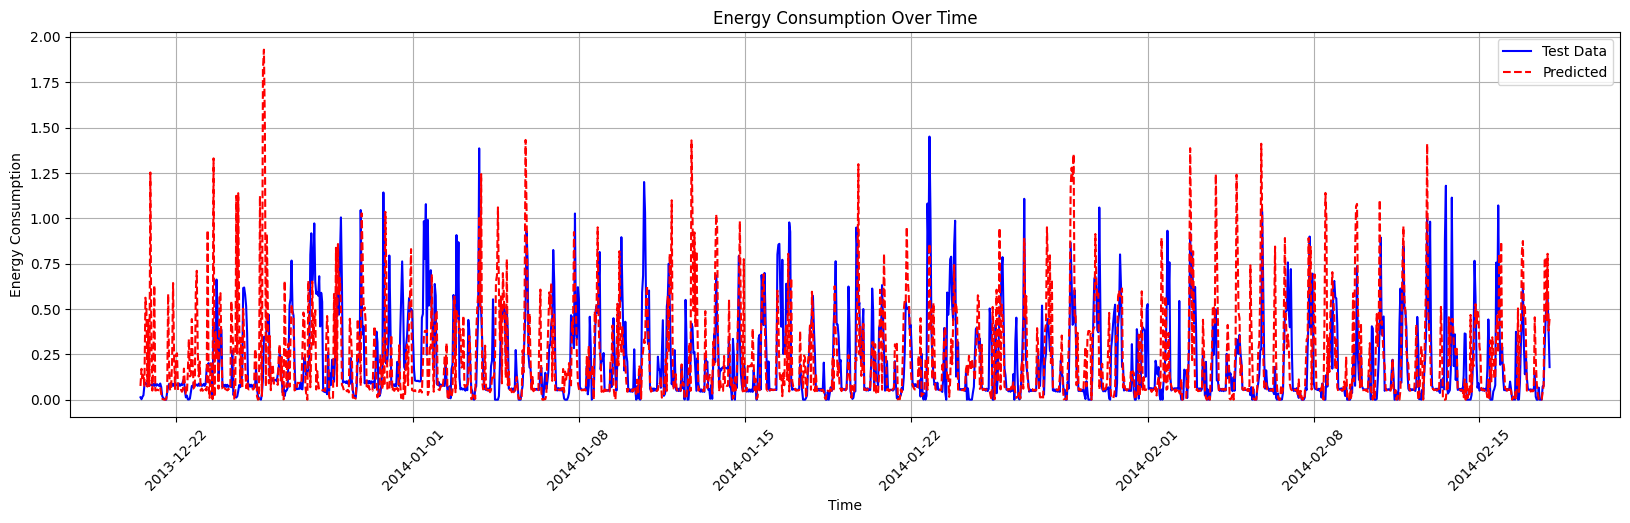

In [200]:
def plot_temporal_preds(test_df):
    test_data = test_df.copy()
    plt.figure(figsize=(20,5))
    plt.plot(test_data.index, test_data['groundtruth'], label='Test Data', color='blue')
    plt.plot(test_data.index, test_data['pred'], label='Predicted', color='red', linestyle='--')
    plt.title('Energy Consumption Over Time')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

plot_temporal_preds(test_df)

In [201]:
print_metrics(test_df['groundtruth'], test_df['pred'])

Mean Absolute Error: 0.16896264005602243
Mean Squared Error: 0.07554921071876754
Root Mean Squared Error: 0.27486216676503067
R2 Score: -0.35333645504523536


As the case with time delay embedding, error scores are not good enough due to the inability of the model to capture trend and seasonality. Notice the negative R2 score.

## **Daily Data**

In [202]:
train_df, test_df = create_train_test_split(daily_df, precision='daily', split_ratio=0.8)
train_df

target  dayofweek_sin  dayofweek_cos  dayofmonth_sin  \
timestamp                                                          
2012-07-03  0.1832       0.781831       0.623490        0.394356   
2012-07-04  0.0531       0.974928      -0.222521        0.571268   
2012-07-05  0.0406       0.433884      -0.900969        0.724793   
2012-07-06  0.1043      -0.433884      -0.900969        0.848644   
2012-07-07  0.1653      -0.974928      -0.222521        0.937752   
...            ...            ...            ...             ...   
2013-10-17  0.1191       0.433884      -0.900969       -0.101168   
2013-10-18  0.1774      -0.433884      -0.900969       -0.299363   
2013-10-19  0.2630      -0.974928      -0.222521       -0.485302   
2013-10-20  0.1821      -0.781831       0.623490       -0.651372   
2013-10-21  0.1470       0.000000       1.000000       -0.790776   

            dayofmonth_cos     month_sin     month_cos  year_sin  year_cos  
timestamp                                                                   
2012-07-03        0.918958  1.224647e-16 -1.000000e+00  0.000000       1.0  
2012-07-04        0.820763  1.224647e-16 -1.000000e+00  0.000000       1.0  
2012-07-05        0.688967  1.224647e-16 -1.000000e+00  0.000000       1.0  
2012-07-06        0.528964  1.224647e-16 -1.000000e+00  0.000000       1.0  
2012-07-07        0.347305  1.224647e-16 -1.000000e+00  0.000000       1.0  
...                    ...           ...           ...       ...       ...  
2013-10-17       -0.994869 -1.000000e+00 -1.836970e-16  0.866025      -0.5  
2013-10-18       -0.954139 -1.000000e+00 -1.836970e-16  0.866025      -0.5  
2013-10-19       -0.874347 -1.000000e+00 -1.836970e-16  0.866025      -0.5  
2013-10-20       -0.758758 -1.000000e+00 -1.836970e-16  0.866025      -0.5  
2013-10-21       -0.612106 -1.000000e+00 -1.836970e-16  0.866025      -0.5  

[476 rows x 9 columns]

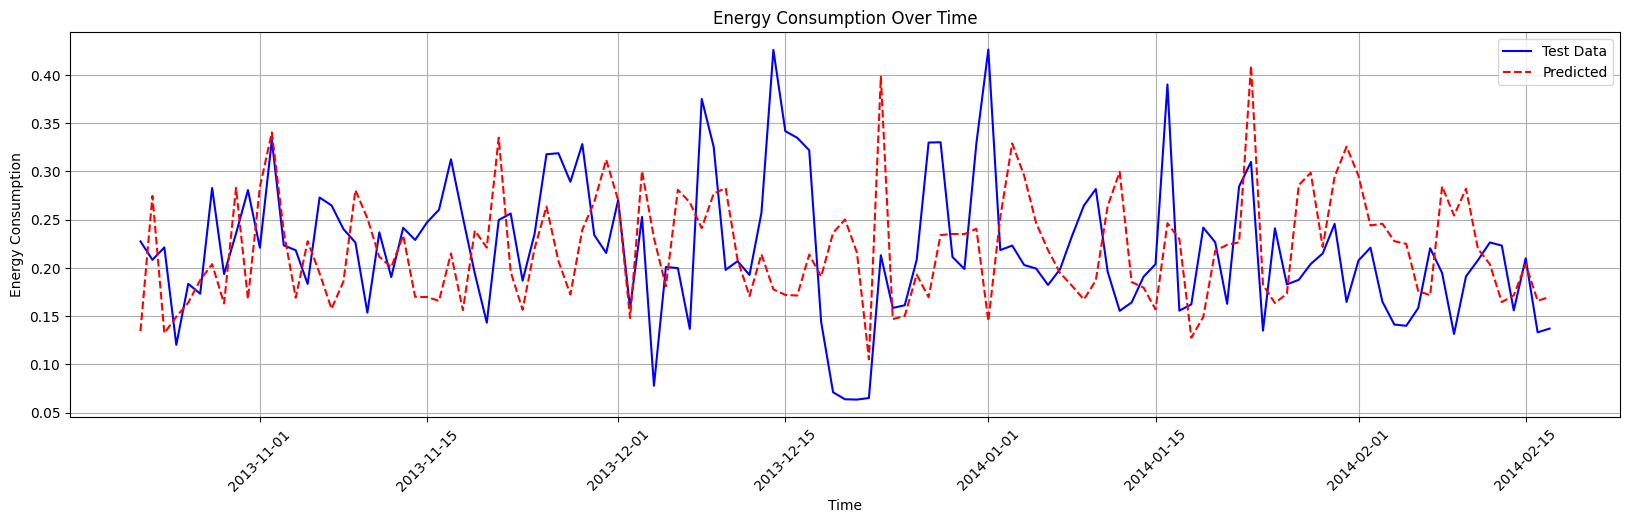

Mean Absolute Error: 0.06965573949579833
Mean Squared Error: 0.007569780258781515
Root Mean Squared Error: 0.08700448413031087
R2 Score: -0.5545677365070592


In [203]:
model, test_preds = train_predict_randomforest(train_df, test_df)
test_df['pred'] = test_preds
plot_temporal_preds(test_df)
print_metrics(test_df['groundtruth'], test_df['pred'])

Visually the model of daily data looks better than hourly and the RMSE error is smaller than in time delay embedding model, but the R2 score doesn't indicate that at all as it is an even bigger negative value than seen in hourly data. 

Also, R2 score of temporal > time delay

## **Weekly Data**

In [204]:
train_df, test_df = create_train_test_split(weekly_df, precision='weekly', split_ratio=0.8)
train_df

target  weekofyear_sin  weekofyear_cos     month_sin  \
timestamp                                                          
2012-07-08  0.1142            -0.0            -1.0  1.224647e-16   
2012-07-15  0.1007       -0.120537       -0.992709  1.224647e-16   
2012-07-22  0.0704       -0.239316       -0.970942  1.224647e-16   
2012-07-29  0.0263       -0.354605       -0.935016  1.224647e-16   
2012-08-05  0.0839       -0.464723       -0.885456 -5.000000e-01   
...            ...             ...             ...           ...   
2013-09-22  0.1303       -0.970942       -0.239316 -8.660254e-01   
2013-09-29  0.1543       -0.992709       -0.120537 -8.660254e-01   
2013-10-06  0.1305            -1.0            -0.0 -1.000000e+00   
2013-10-13  0.1877       -0.992709        0.120537 -1.000000e+00   
2013-10-20  0.1719       -0.970942        0.239316 -1.000000e+00   

               month_cos  year_sin  year_cos  
timestamp                                     
2012-07-08 -1.000000e+00  0.000000       1.0  
2012-07-15 -1.000000e+00  0.000000       1.0  
2012-07-22 -1.000000e+00  0.000000       1.0  
2012-07-29 -1.000000e+00  0.000000       1.0  
2012-08-05 -8.660254e-01  0.000000       1.0  
...                  ...       ...       ...  
2013-09-22 -5.000000e-01  0.866025      -0.5  
2013-09-29 -5.000000e-01  0.866025      -0.5  
2013-10-06 -1.836970e-16  0.866025      -0.5  
2013-10-13 -1.836970e-16  0.866025      -0.5  
2013-10-20 -1.836970e-16  0.866025      -0.5  

[68 rows x 7 columns]

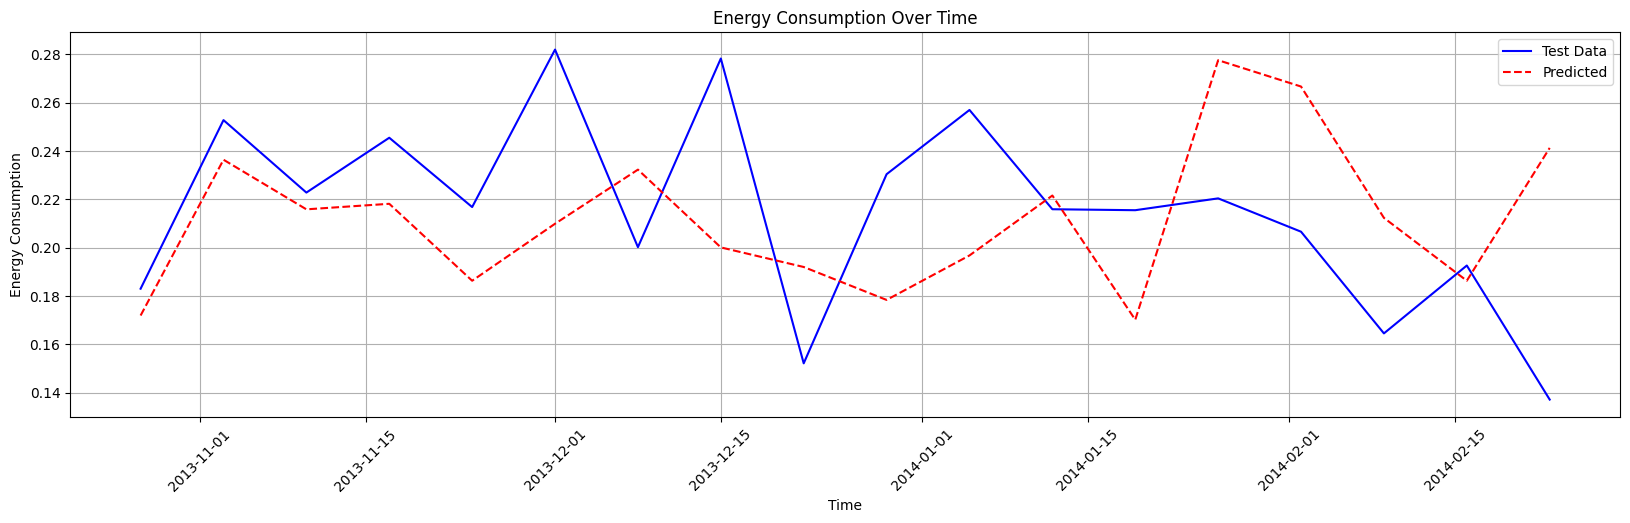

Mean Absolute Error: 0.041862166666666666
Mean Squared Error: 0.002474960163388885
Root Mean Squared Error: 0.0497489714807139
R2 Score: -0.6294430962713169


In [205]:
model, test_preds = train_predict_randomforest(train_df, test_df)
test_df['pred'] = test_preds
plot_temporal_preds(test_df)
print_metrics(test_df['groundtruth'], test_df['pred'])

same case as with the daily data, but here the errors are lower. In fact the RMSE is half its value in the daily data.

## **Monthly Data**

In [206]:
train_df, test_df = create_train_test_split(monthly_df, precision='monthly', split_ratio=0.7)
train_df

target     month_sin     month_cos  year_sin  year_cos
timestamp                                                         
2012-07-31  0.0773  1.224647e-16 -1.000000e+00  0.000000       1.0
2012-08-31  0.0601 -5.000000e-01 -8.660254e-01  0.000000       1.0
2012-09-30  0.1358 -8.660254e-01 -5.000000e-01  0.000000       1.0
2012-10-31  0.1718 -1.000000e+00 -1.836970e-16  0.000000       1.0
2012-11-30  0.2089 -8.660254e-01  5.000000e-01  0.000000       1.0
2012-12-31  0.1959 -5.000000e-01  8.660254e-01  0.000000       1.0
2013-01-31  0.2314  0.000000e+00  1.000000e+00  0.866025      -0.5
2013-02-28  0.2251  5.000000e-01  8.660254e-01  0.866025      -0.5
2013-03-31  0.1772  8.660254e-01  5.000000e-01  0.866025      -0.5
2013-04-30  0.1167  1.000000e+00  6.123234e-17  0.866025      -0.5
2013-05-31  0.1015  8.660254e-01 -5.000000e-01  0.866025      -0.5
2013-06-30  0.0919  5.000000e-01 -8.660254e-01  0.866025      -0.5
2013-07-31  0.0689  1.224647e-16 -1.000000e+00  0.866025      -0.5
2013-08-31  0.0967 -5.000000e-01 -8.660254e-01  0.866025      -0.5

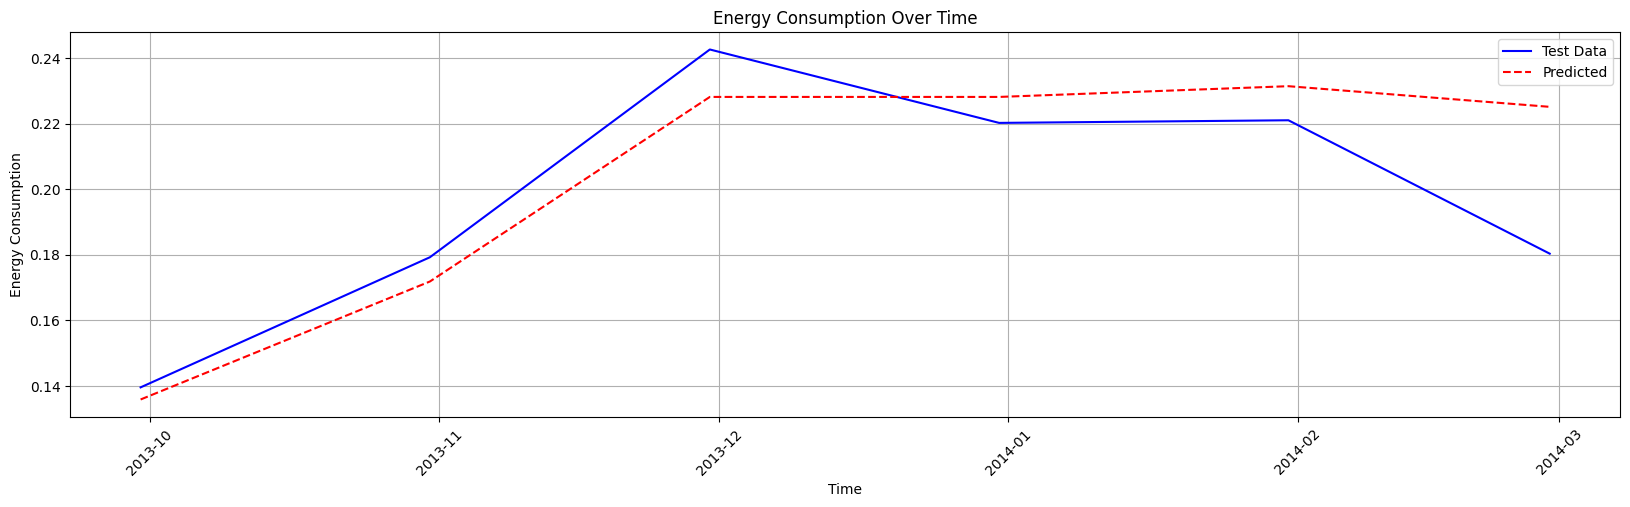

Mean Absolute Error: 0.014783333333333504
Mean Squared Error: 0.00040933239200000417
Root Mean Squared Error: 0.02023196461048714
R2 Score: 0.6538646209179337


In [207]:
model, test_preds = train_predict_randomforest(train_df, test_df)
test_df['pred'] = test_preds
plot_temporal_preds(test_df)
print_metrics(test_df['groundtruth'], test_df['pred'])

Interestingly enough, monthly data prediction outscored all previous precisions!

# **Combined Embedding**

## **Hourly Data**

Prompt:Those functions get the time delay embedding and the temporal embedding of the data (whether its hourly, daily, weekly or monthly), make a function that combines both and add features of both the temporal and time delay embedding of 2 lags: lag1 and lag2. Here are the functions I used and want:

In [224]:
def create_temporal_and_time_delay_embeddings(df, precision='hourly', split_ratio=0.9, taw=1, num_lags=2):
    """
    Create temporal (cyclical) and time-delay embeddings together, then split into train and test.

    Args:
    - df (pd.DataFrame): Data with 'timestamp' and 'energy_consumption' columns.
    - precision (str): 'hourly', 'daily', 'weekly', 'monthly'.
    - split_ratio (float): Ratio to split train/test.
    - taw (int): Gap between lags.
    - num_lags (int): Number of lags to create.

    Returns:
    - train_df (pd.DataFrame): Training set.
    - test_df (pd.DataFrame): Testing set.
    """
    df = df.copy()
    df = df.set_index('timestamp')

    # Add Year first
    df['year'] = df.index.year - df.index.year.min()
    max_year = df['year'].max() + 1

    # Temporal features
    if precision == 'hourly':
        df['hour'] = df.index.hour
        df['dayofweek'] = df.index.dayofweek
        df['dayofmonth'] = df.index.day - 1
        df['month'] = df.index.month - 1
        cyclical_features = [
            ('hour', 24),
            ('dayofweek', 7),
            ('dayofmonth', 31),
            ('month', 12),
            ('year', max_year)
        ]
        
    elif precision == 'daily':
        df['dayofweek'] = df.index.dayofweek
        df['dayofmonth'] = df.index.day - 1
        df['month'] = df.index.month - 1
        cyclical_features = [
            ('dayofweek', 7),
            ('dayofmonth', 31),
            ('month', 12),
            ('year', max_year)
        ]
        
    elif precision == 'weekly':
        df['weekofyear'] = df.index.isocalendar().week - 1
        df['month'] = df.index.month - 1
        cyclical_features = [
            ('weekofyear', 52),
            ('month', 12),
            ('year', max_year)
        ]

    elif precision == 'monthly':
        df['month'] = df.index.month - 1
        cyclical_features = [
            ('month', 12),
            ('year', max_year)
        ]
    
    else:
        raise ValueError(f"Unsupported precision: {precision}. Choose from 'hourly', 'daily', 'weekly', or 'monthly'.")
    
    # Drop LCLid if exists
    if 'LCLid' in df.columns:
        df.drop(columns=['LCLid'], inplace=True)

    # Add cyclical encodings
    for col, period in cyclical_features:
        df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / period)
        df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / period)

    # Drop the original time columns
    df.drop(columns=[col for col, _ in cyclical_features], inplace=True)

    # Time-delay embedding
    for i in range(1, num_lags + 1):
        df[f'lag{i}'] = df['energy_consumption'].shift(i * taw)

    # Drop rows with NaN due to lagging
    df.dropna(inplace=True)

    # Rename energy_consumption to target
    
    # Train-test split
    split_point = int(len(df) * split_ratio)
    train_df = df.iloc[:split_point].copy()
    test_df = df.iloc[split_point:].copy()
    train_df.rename(columns={'energy_consumption': 'target'}, inplace=True)
    test_df.rename(columns={'energy_consumption': 'groundtruth'}, inplace=True)

    return train_df, test_df

In [225]:
train_df, test_df = create_temporal_and_time_delay_embeddings(hourly_df, precision='hourly', split_ratio=0.9, taw=1, num_lags=2)
train_df

target  hour_sin      hour_cos  dayofweek_sin  \
timestamp                                                            
2012-07-03 02:00:00  0.0535  0.500000  8.660254e-01       0.781831   
2012-07-03 03:00:00  0.0430  0.707107  7.071068e-01       0.781831   
2012-07-03 04:00:00  0.0550  0.866025  5.000000e-01       0.781831   
2012-07-03 05:00:00  0.0450  0.965926  2.588190e-01       0.781831   
2012-07-03 06:00:00  0.0370  1.000000  6.123234e-17       0.781831   
...                     ...       ...           ...            ...   
2013-12-20 07:00:00  0.0935  0.965926 -2.588190e-01      -0.433884   
2013-12-20 08:00:00  0.0685  0.866025 -5.000000e-01      -0.433884   
2013-12-20 09:00:00  0.0730  0.707107 -7.071068e-01      -0.433884   
2013-12-20 10:00:00  0.0040  0.500000 -8.660254e-01      -0.433884   
2013-12-20 11:00:00  0.0005  0.258819 -9.659258e-01      -0.433884   

                     dayofweek_cos  dayofmonth_sin  dayofmonth_cos  \
timestamp                                                            
2012-07-03 02:00:00       0.623490        0.394356        0.918958   
2012-07-03 03:00:00       0.623490        0.394356        0.918958   
2012-07-03 04:00:00       0.623490        0.394356        0.918958   
2012-07-03 05:00:00       0.623490        0.394356        0.918958   
2012-07-03 06:00:00       0.623490        0.394356        0.918958   
...                            ...             ...             ...   
2013-12-20 07:00:00      -0.900969       -0.651372       -0.758758   
2013-12-20 08:00:00      -0.900969       -0.651372       -0.758758   
2013-12-20 09:00:00      -0.900969       -0.651372       -0.758758   
2013-12-20 10:00:00      -0.900969       -0.651372       -0.758758   
2013-12-20 11:00:00      -0.900969       -0.651372       -0.758758   

                        month_sin  month_cos  year_sin  year_cos    lag1  \
timestamp                                                                  
2012-07-03 02:00:00  1.224647e-16  -1.000000  0.000000       1.0  0.0525   
2012-07-03 03:00:00  1.224647e-16  -1.000000  0.000000       1.0  0.0535   
2012-07-03 04:00:00  1.224647e-16  -1.000000  0.000000       1.0  0.0430   
2012-07-03 05:00:00  1.224647e-16  -1.000000  0.000000       1.0  0.0550   
2012-07-03 06:00:00  1.224647e-16  -1.000000  0.000000       1.0  0.0450   
...                           ...        ...       ...       ...     ...   
2013-12-20 07:00:00 -5.000000e-01   0.866025  0.866025      -0.5  0.0775   
2013-12-20 08:00:00 -5.000000e-01   0.866025  0.866025      -0.5  0.0935   
2013-12-20 09:00:00 -5.000000e-01   0.866025  0.866025      -0.5  0.0685   
2013-12-20 10:00:00 -5.000000e-01   0.866025  0.866025      -0.5  0.0730   
2013-12-20 11:00:00 -5.000000e-01   0.866025  0.866025      -0.5  0.0040   

                       lag2  
timestamp                    
2012-07-03 02:00:00  0.0445  
2012-07-03 03:00:00  0.0525  
2012-07-03 04:00:00  0.0535  
2012-07-03 05:00:00  0.0430  
2012-07-03 06:00:00  0.0550  
...                     ...  
2013-12-20 07:00:00  0.0785  
2013-12-20 08:00:00  0.0775  
2013-12-20 09:00:00  0.0935  
2013-12-20 10:00:00  0.0685  
2013-12-20 11:00:00  0.0730  

[12850 rows x 13 columns]

In [218]:
model, test_preds = train_predict_randomforest(train_df, test_df)
test_df['pred'] = test_preds

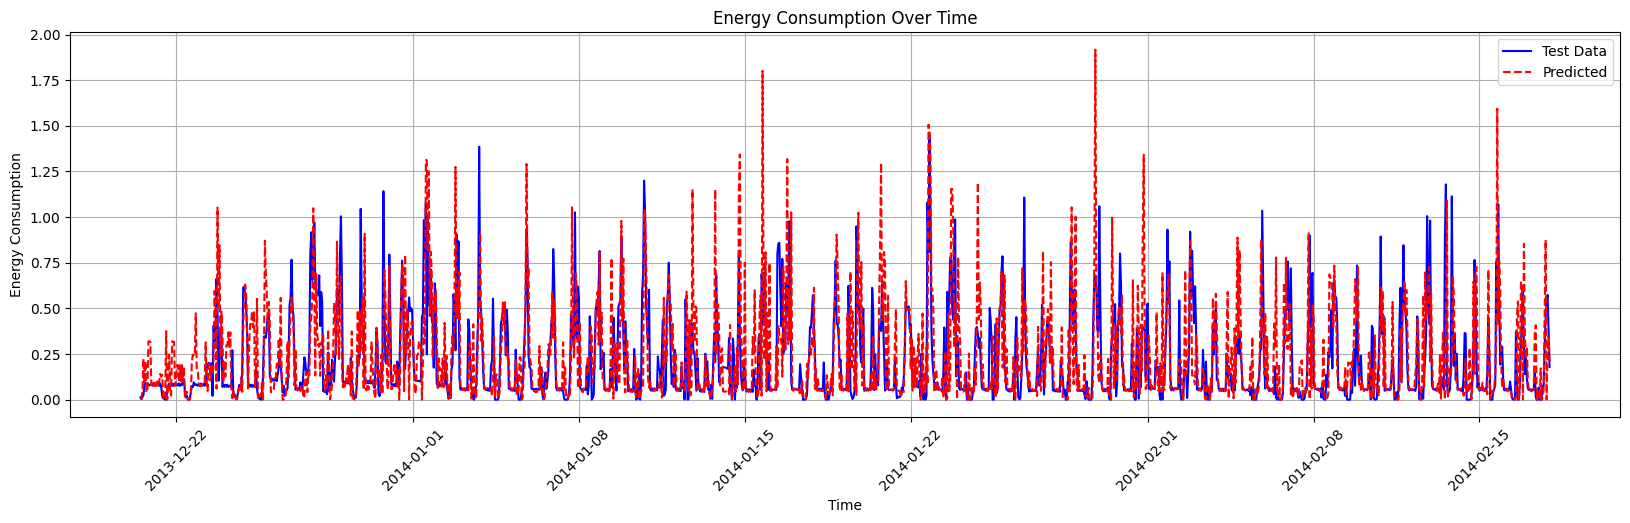

Mean Absolute Error: 0.14906044117647058
Mean Squared Error: 0.05967618093904061
Root Mean Squared Error: 0.24428708713118794
R2 Score: -0.06899794709062146


In [219]:
def plot_combined(test_df): plot_temporal_preds(test_df)

plot_combined(test_df)
print_metrics(test_df['groundtruth'], test_df['pred'])

A near 0 R2 score, that is better than time delay and temporal embedding alone in the case of hourly data, errors didn't improve that much though.

## **Daily Data**

In [227]:
train_df, test_df = create_temporal_and_time_delay_embeddings(daily_df, precision='daily', split_ratio=0.8, taw=1, num_lags=2)
train_df

target  dayofweek_sin  dayofweek_cos  dayofmonth_sin  \
timestamp                                                          
2012-07-05  0.0406       0.433884      -0.900969        0.724793   
2012-07-06  0.1043      -0.433884      -0.900969        0.848644   
2012-07-07  0.1653      -0.974928      -0.222521        0.937752   
2012-07-08  0.1389      -0.781831       0.623490        0.988468   
2012-07-09  0.1150       0.000000       1.000000        0.998717   
...            ...            ...            ...             ...   
2013-10-17  0.1191       0.433884      -0.900969       -0.101168   
2013-10-18  0.1774      -0.433884      -0.900969       -0.299363   
2013-10-19  0.2630      -0.974928      -0.222521       -0.485302   
2013-10-20  0.1821      -0.781831       0.623490       -0.651372   
2013-10-21  0.1470       0.000000       1.000000       -0.790776   

            dayofmonth_cos     month_sin     month_cos  year_sin  year_cos  \
timestamp                                                                    
2012-07-05        0.688967  1.224647e-16 -1.000000e+00  0.000000       1.0   
2012-07-06        0.528964  1.224647e-16 -1.000000e+00  0.000000       1.0   
2012-07-07        0.347305  1.224647e-16 -1.000000e+00  0.000000       1.0   
2012-07-08        0.151428  1.224647e-16 -1.000000e+00  0.000000       1.0   
2012-07-09       -0.050649  1.224647e-16 -1.000000e+00  0.000000       1.0   
...                    ...           ...           ...       ...       ...   
2013-10-17       -0.994869 -1.000000e+00 -1.836970e-16  0.866025      -0.5   
2013-10-18       -0.954139 -1.000000e+00 -1.836970e-16  0.866025      -0.5   
2013-10-19       -0.874347 -1.000000e+00 -1.836970e-16  0.866025      -0.5   
2013-10-20       -0.758758 -1.000000e+00 -1.836970e-16  0.866025      -0.5   
2013-10-21       -0.612106 -1.000000e+00 -1.836970e-16  0.866025      -0.5   

              lag1    lag2  
timestamp                   
2012-07-05  0.0531  0.1832  
2012-07-06  0.0406  0.0531  
2012-07-07  0.1043  0.0406  
2012-07-08  0.1653  0.1043  
2012-07-09  0.1389  0.1653  
...            ...     ...  
2013-10-17  0.0941  0.1446  
2013-10-18  0.1191  0.0941  
2013-10-19  0.1774  0.1191  
2013-10-20  0.2630  0.1774  
2013-10-21  0.1821  0.2630  

[474 rows x 11 columns]

In [228]:
model, test_preds = train_predict_randomforest(train_df, test_df)
test_df['pred'] = test_preds

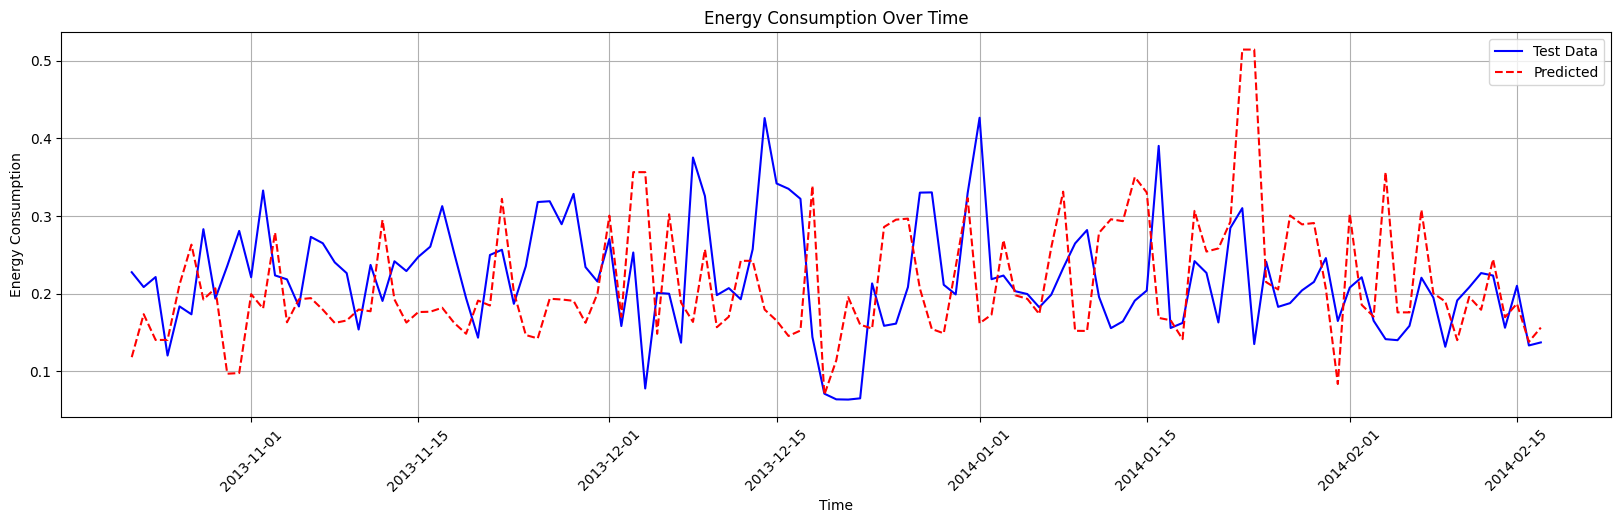

Mean Absolute Error: 0.0821386806722689
Mean Squared Error: 0.011312663968327736
Root Mean Squared Error: 0.10636100774404
R2 Score: -1.3232249573832444


In [229]:
plot_combined(test_df)
print_metrics(test_df['groundtruth'], test_df['pred'])

Combined embedding gave worse results in daily data, may be overengineering and adding the features together confused the model making it give inconsistent output as seen from the graph above. Ironically, we can see that the model is wrong in most of the points.

## **Weekly Data**

In [230]:
train_df, test_df = create_temporal_and_time_delay_embeddings(weekly_df, precision='weekly', split_ratio=0.8, taw=1, num_lags=2)
train_df

target  weekofyear_sin  weekofyear_cos     month_sin  \
timestamp                                                          
2012-07-22  0.0704       -0.239316       -0.970942  1.224647e-16   
2012-07-29  0.0263       -0.354605       -0.935016  1.224647e-16   
2012-08-05  0.0839       -0.464723       -0.885456 -5.000000e-01   
2012-08-12  0.0468       -0.568065       -0.822984 -5.000000e-01   
2012-08-19  0.0336       -0.663123       -0.748511 -5.000000e-01   
...            ...             ...             ...           ...   
2013-09-29  0.1543       -0.992709       -0.120537 -8.660254e-01   
2013-10-06  0.1305            -1.0            -0.0 -1.000000e+00   
2013-10-13  0.1877       -0.992709        0.120537 -1.000000e+00   
2013-10-20  0.1719       -0.970942        0.239316 -1.000000e+00   
2013-10-27  0.1830       -0.935016        0.354605 -1.000000e+00   

               month_cos  year_sin  year_cos    lag1    lag2  
timestamp                                                     
2012-07-22 -1.000000e+00  0.000000       1.0  0.1007  0.1142  
2012-07-29 -1.000000e+00  0.000000       1.0  0.0704  0.1007  
2012-08-05 -8.660254e-01  0.000000       1.0  0.0263  0.0704  
2012-08-12 -8.660254e-01  0.000000       1.0  0.0839  0.0263  
2012-08-19 -8.660254e-01  0.000000       1.0  0.0468  0.0839  
...                  ...       ...       ...     ...     ...  
2013-09-29 -5.000000e-01  0.866025      -0.5  0.1303  0.1576  
2013-10-06 -1.836970e-16  0.866025      -0.5  0.1543  0.1303  
2013-10-13 -1.836970e-16  0.866025      -0.5  0.1305  0.1543  
2013-10-20 -1.836970e-16  0.866025      -0.5  0.1877  0.1305  
2013-10-27 -1.836970e-16  0.866025      -0.5  0.1719  0.1877  

[67 rows x 9 columns]

In [231]:
model, test_preds = train_predict_randomforest(train_df, test_df)
test_df['pred'] = test_preds

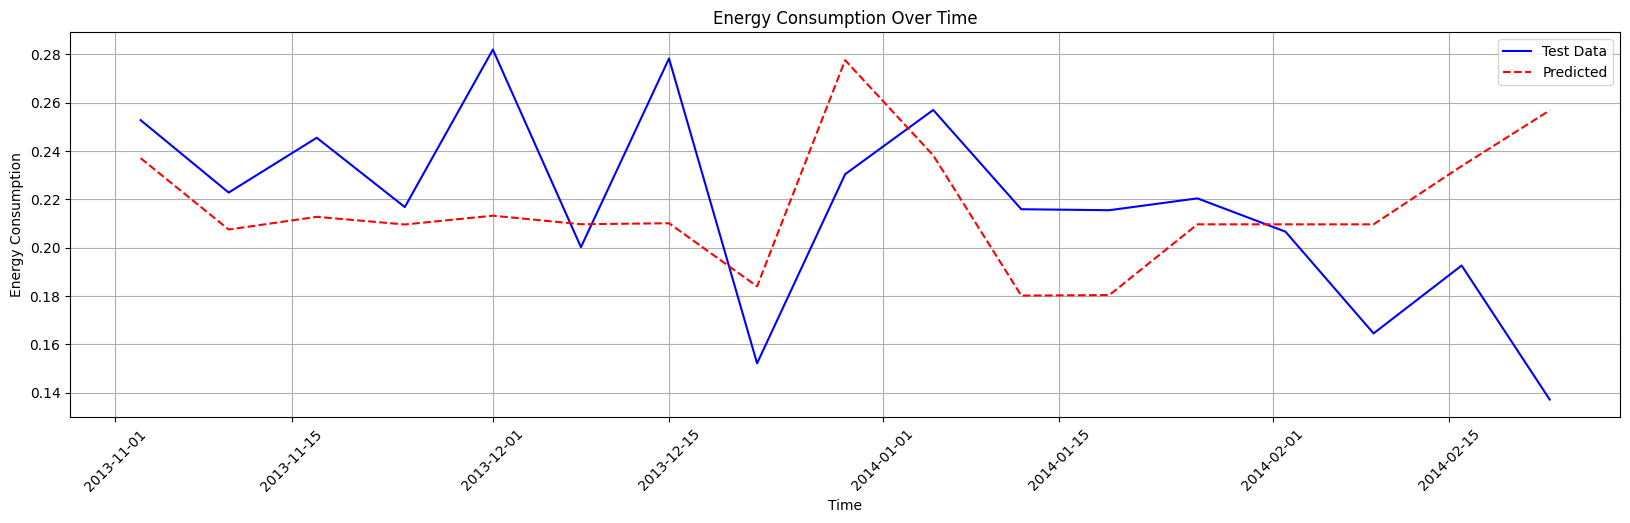

Mean Absolute Error: 0.035650058823529486
Mean Squared Error: 0.0020809847819411795
Root Mean Squared Error: 0.045617812112607715
R2 Score: -0.34805833784513474


In [232]:
plot_combined(test_df)
print_metrics(test_df['groundtruth'], test_df['pred'])

Better results than time delay and temporal embeddings alone, though a negative R2 score is still far away from a good result. Visually, we can see the model is still not a good predictor.

## **Monthly Data**

In [233]:
train_df, test_df = create_temporal_and_time_delay_embeddings(monthly_df, precision='monthly', split_ratio=0.7, taw=1, num_lags=2)
train_df

target     month_sin     month_cos  year_sin  year_cos    lag1  \
timestamp                                                                    
2012-09-30  0.1358 -8.660254e-01 -5.000000e-01  0.000000       1.0  0.0601   
2012-10-31  0.1718 -1.000000e+00 -1.836970e-16  0.000000       1.0  0.1358   
2012-11-30  0.2089 -8.660254e-01  5.000000e-01  0.000000       1.0  0.1718   
2012-12-31  0.1959 -5.000000e-01  8.660254e-01  0.000000       1.0  0.2089   
2013-01-31  0.2314  0.000000e+00  1.000000e+00  0.866025      -0.5  0.1959   
2013-02-28  0.2251  5.000000e-01  8.660254e-01  0.866025      -0.5  0.2314   
2013-03-31  0.1772  8.660254e-01  5.000000e-01  0.866025      -0.5  0.2251   
2013-04-30  0.1167  1.000000e+00  6.123234e-17  0.866025      -0.5  0.1772   
2013-05-31  0.1015  8.660254e-01 -5.000000e-01  0.866025      -0.5  0.1167   
2013-06-30  0.0919  5.000000e-01 -8.660254e-01  0.866025      -0.5  0.1015   
2013-07-31  0.0689  1.224647e-16 -1.000000e+00  0.866025      -0.5  0.0919   
2013-08-31  0.0967 -5.000000e-01 -8.660254e-01  0.866025      -0.5  0.0689   

              lag2  
timestamp           
2012-09-30  0.0773  
2012-10-31  0.0601  
2012-11-30  0.1358  
2012-12-31  0.1718  
2013-01-31  0.2089  
2013-02-28  0.1959  
2013-03-31  0.2314  
2013-04-30  0.2251  
2013-05-31  0.1772  
2013-06-30  0.1167  
2013-07-31  0.1015  
2013-08-31  0.0919

In [234]:
model, test_preds = train_predict_randomforest(train_df, test_df)
test_df['pred'] = test_preds

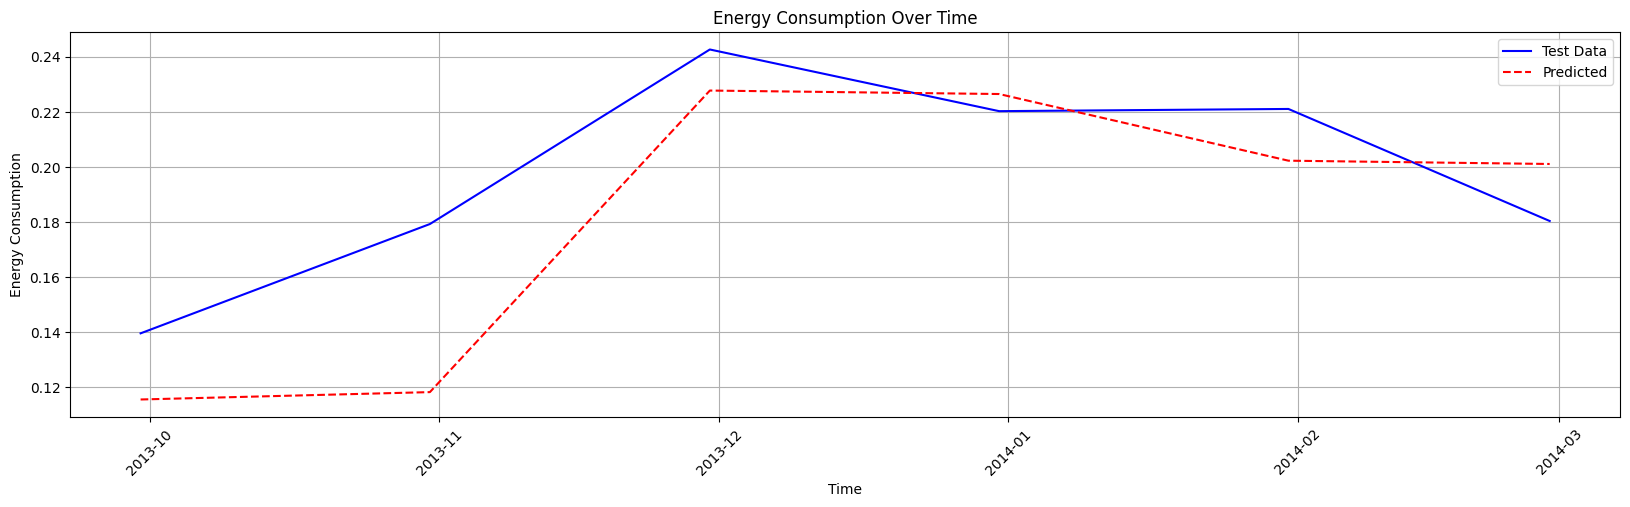

Mean Absolute Error: 0.024288166666666677
Mean Squared Error: 0.000891409223833334
Root Mean Squared Error: 0.029856477083429218
R2 Score: 0.24621584893091397


In [235]:
plot_combined(test_df)
print_metrics(test_df['groundtruth'], test_df['pred'])

As displayed in the cases of monthly data before, the model is better in this precision (monthly) than other precisions. However, interestingly enough, the temporal embedding model achieved better testing results than the combined embedding. May be the model got confused as the case with daily data with combined embedding.

# **End of Notebook**

We have reached the end of our experiments. I hope it was informative enough (^_^)

<center>
<span style="font-size: 2em; font-weight: bold; color: #118;">
Thank You for Reading this Notebook.
</span>
</center>